# Forest Cover Type Prediction

## Project description : 
*Get started on this competition with Kaggle Scripts. No data download or local environment needed!*

*Random forests? Cover trees? Not so fast, computer nerds. We're talking about the real thing.*

*In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.*

*This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.*

Every variables described in the description seem to be cartographic, no trap here, we can use them all.

## Ressources : 
* data origin : Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

## github :
 https://github.com/ClaireGayral/formation_openclassroom/tree/master/P8_gayral_claire

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time


DATA_PATH = "/home/clairegayral/Documents/openclassroom/data/P8/forest/"
RES_PATH = "/home/clairegayral/Documents/openclassroom/res/P8/"

## my .py : 
from script01_duplicates import *
from script02_missing_values_treatment import *
from script03_univariate_analysis import *
from script04_multivariate_analysis import *
from script05_CV_regression import *
from script06_reduce_dim import *

## extract list of text :
from bs4 import BeautifulSoup
import re
# from sklearn.feature_extraction.s import s# import ENGLISH_STOP_WORDS

# from sklearn import model_selection 
# from sklearn import preprocessing
# from sklearn import neighbors
# from sklearn import linear_model

# from sklearn.impute import KNNImputer
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import fbeta_score
# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import fowlkes_mallows_score
# from sklearn.metrics.pairwise import pairwise_kernels


####################################################

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif

import re
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier

############################################


# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LogisticRegression

# from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram


from bs4 import BeautifulSoup
import nltk
from collections import defaultdict
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.utils import tokenize
from gensim import corpora
from gensim import models
from gensim.models import FastText

# How to reconcile categorical and numerical data for classification ? 

## Table of contents :

<a id ="menu"></a>
1. [ Exploratory Analysis for Categorical Variables](#section1)
    1. [Outputs - the soils](#section1.1)
    2. [Categorical Input Variables](#section1.2)
        1. [Univariate Analysis](#section1.2)
        2. [Multivariate Analysis](#section1.2)
    3. [Feature engineering](#section1.3)
        1. [Classical preprocess](#section1.3.1)
        2. [Feature selection](#section1.3.2)
        3. [Reduction of dimension](#section1.3.3)
    
2. [ Exploratory Analysis for Numerical data](#section2)
    1. [Univariate Analysis](#section2.1)
    2. [Multivariate Analysis](#section2.2)
    3. [Feature engineering](#section2.3)
        1. [Classical preprocess](#section2.3.1)
<!--         2. [Feature selection](#section2.3.2) -->
        2. [Reduction of dimension](#section2.3.2)
        3. [Hand made](#section2.3.3)
        
3. [Traitements sur le text](#section3)
<!--     1. [Preprocessing sur les tokens](#section1.2)
        2. [Tokenization](#section3.1.1)
        3. [Stopwords](#section3.1.2)
        4. [Lemmatization](#section3.1.3)   
    2. [Représentation des mots](#section3.2)
          1. [Bag of Words](#section3.2.1)
          2. [tf-idf](#section3.2.2)
          3. [Word to vect](#section3.2.3)       
          4. [Représentation en nuage de mots](#section3.2.4)
<!--     3. [Réduction de dimension](#section3.3) -->


In [24]:
df_train = pd.read_csv(DATA_PATH+"/train.csv", index_col=0)
print("train data shape : ", df_train.shape)
df_train.head()

train data shape :  (15120, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [25]:
df_test = pd.read_csv(DATA_PATH+"/test.csv", index_col=0)
print("test data shape : ", df_test.shape)
df_test.head()

test data shape :  (565892, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


A first reading of the data allows to separate the input variables from the output variables : 

In [378]:
X = df_train.loc[:,[col for col in df_train.columns if col != "Cover_Type"]]
y = df_train.loc[:,"Cover_Type"]

 I split categorical and numerical data to analyse them. In the [project data description](https://www.kaggle.com/c/forest-cover-type-prediction/data) every column is well defined.


In [379]:
soil_vars = ['Soil_Type' +str(k) for k in range(1,41)]
area_vars = ['Wilderness_Area' +str(k) for k in range(1,5)]

cat_vars = soil_vars + area_vars
num_vars = [col for col in X.columns if col not in cat_vars]

<a id ="section1"></a>
<a id ="section1.1"></a>
[back to menu](#menu)

# 1. Exploratory Analysis for Categorical data

Let's begin with output data.

## 1.A Output Variable

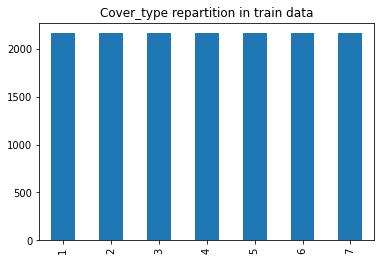

In [380]:
# sns.countplot(x = "soil_type", data = X_cat, sort)
y.value_counts().plot(kind= "bar")
plt.title("Cover_type repartition in train data")
plt.xticks(rotation=90)
plt.show()

The output categories are well represented, the repartition in each class is homogeneous.

<a id ="section1.2"></a>
[back to menu](#menu)

## 1.B Categorical Input Variables

In [381]:
## Recall :
# soil_vars = ['Soil_Type' +str(k) for k in range(1,41)]
# area_vars = ['Wilderness_Area' +str(k) for k in range(1,5)]

## remove text in var name to clarify plots : 
def get_final_int(x) : return(int(re.split(r'(\d+)', x)[-2]))

map_soil_var = {var : get_final_int(var) for var in soil_vars}
soil_cat = X.loc[:,soil_vars] 
soil_cat = soil_cat.rename(map_soil_var, axis=1)
soil_cat = soil_cat.idxmax(axis=1)

map_area_var = {var : get_final_int(var) for var in area_vars}
area_cat = X.loc[:,area_vars] 
area_cat = area_cat.rename(map_area_var, axis=1)
area_cat = area_cat.idxmax(axis=1)

<a id ="section1.2.1"></a>
[back to menu](#menu)

## 1.B.a Univariate Analysis

A quick check of the categorical variables shows that the classes are well separated (we are not in multi-label classification)

In [382]:
tmp = X.loc[:, soil_vars].sum(axis=1).value_counts()
print("Percentage of one-classe soil : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

tmp = X.loc[:, area_vars].sum(axis=1).value_counts()
print("Percentage of one-classe area : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

Percentage of one-classe soil :  100.0 %
Percentage of one-classe area :  100.0 %


Univariate analysis :

In [383]:
X_cat = pd.concat((soil_cat,area_cat), axis=1)
X_cat = X_cat.rename({0:"soil_type", 1: "area"}, axis=1)

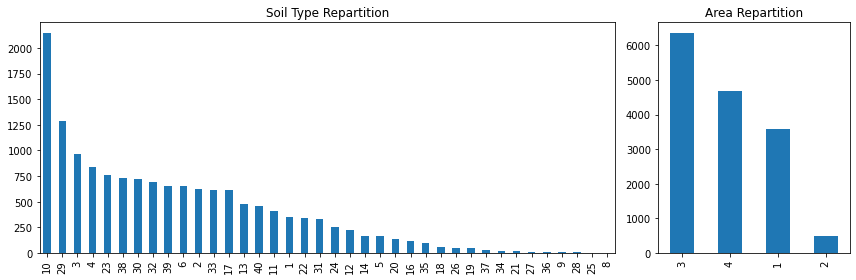

In [416]:
# plot it
f, (a0, a1) = plt.subplots(1, 2, 
                           gridspec_kw={'width_ratios': [3, 1]},
                           figsize=(12,4))

# sns.countplot(x = "soil_type", data = X_cat, sort)
X_cat["soil_type"].value_counts().plot(kind= "bar", ax=a0)
a0.set_title("Soil Type Repartition")

X_cat["area"].value_counts().plot(kind= "bar", ax=a1)
a1.set_title("Area Repartition")
plt.tight_layout()
plt.savefig(RES_PATH + "figures/"+"cat_hist")
plt.show()

Note that some categories like "soil_type_25" or "2" are very badly represented
<a id ="section1.2.2"></a>
[back to menu](#menu)

## 1.B.b Multivariate Analysis
### Bivariate analysis (input/input)

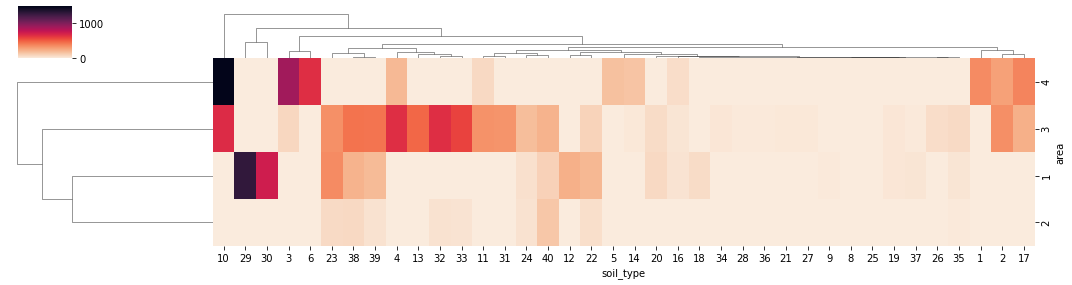

In [385]:
sns.clustermap(pd.crosstab(X_cat["area"], X_cat["soil_type"]),
               figsize=(15, 4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

The distribution of the two categories is structured: we will have to pay attention to the correlation between the two. 
It may be a good idea to use the text description of soil to gather them (TODO : see if text-mining is relevant)

In [386]:
from caterogical_vars_description import *

### Output/input categorical link :
Let's reveal the correlation between our categories and the output variable : 

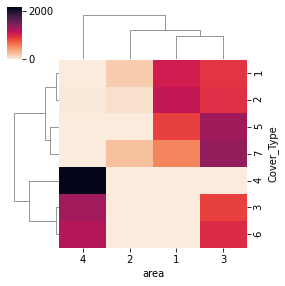

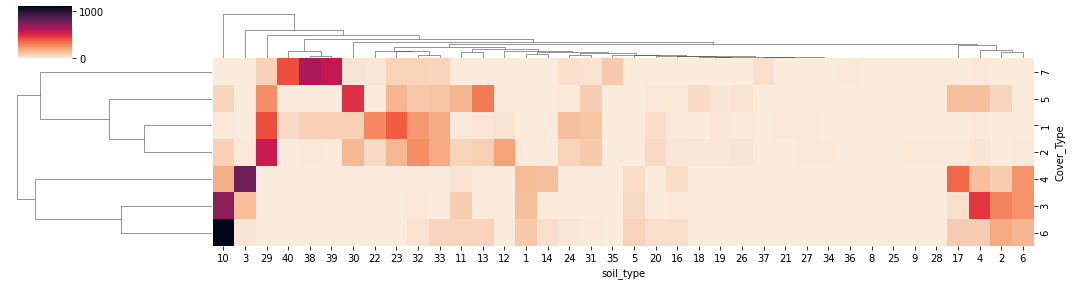

In [387]:
X_caty = pd.concat((X_cat, y), axis = 1)
sns.clustermap(pd.crosstab(X_caty["Cover_Type"],X_caty["area"]),
               figsize=(4, 4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

sns.clustermap(pd.crosstab(X_caty["Cover_Type"],X_caty["soil_type"]),
               figsize=(15,4), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

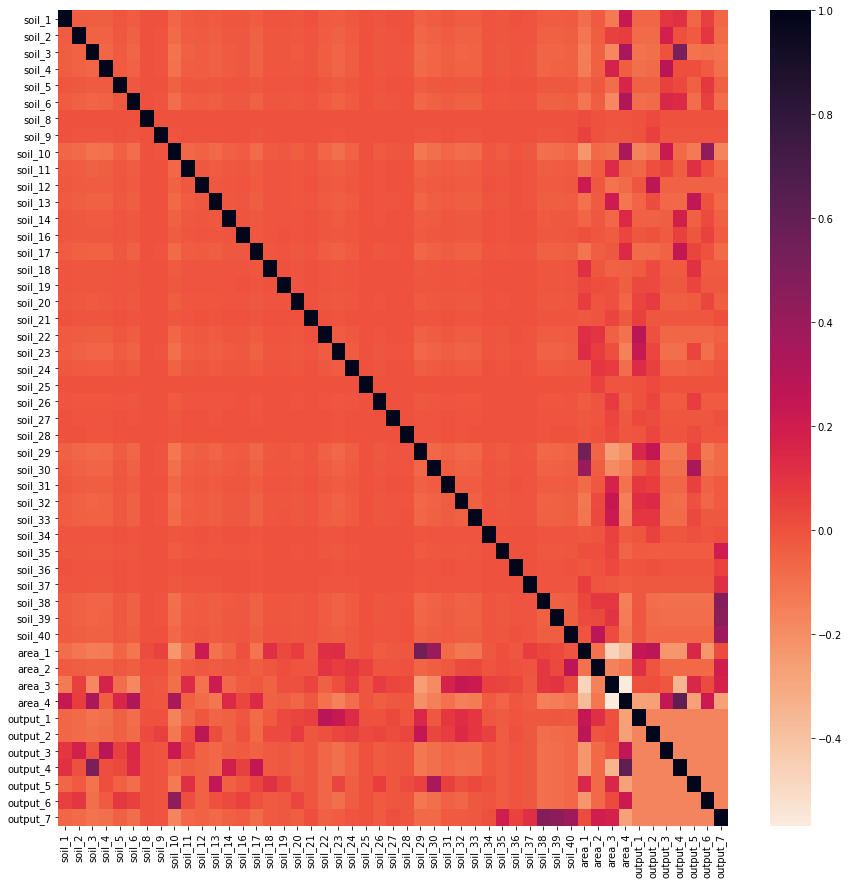

In [388]:
plt.figure(figsize=(15,15))
X_caty_dum = pd.concat((pd.get_dummies(X_cat.soil_type, "soil"),
                        pd.get_dummies(X_cat.area, "area"),
                        pd.get_dummies(y,"output")), axis = 1)
sns.heatmap(X_caty_dum.corr(), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

There's a real link between the categorical inputs and the classification. 

<a id ="section1.3"></a>
[back to menu](#menu)

## 1.C Feature engineering : 

The selection of relevant feature is well documented in [sklearn](https://scikit-learn.org/stable/modules/feature_selection.html)

<a id ="section1.3.1"></a>
[back to menu](#menu)

### 1.C.a Classical preprocessing 
First of all, let's split the training data, and remove constant variables. 

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,cat_vars], y, random_state=10)
# train_index = X_train.index
# test_index = X_test.index

#### Drop non variant variables :

In [436]:
pd.DataFrame(np.round(pd.get_dummies(X_cat["area"]).std(), 2), columns=["std"]).transpose()

,1,2,3,4
std,0.43,0.18,0.49,0.46


In [437]:
pd.DataFrame(np.round(pd.get_dummies(X_cat["soil_type"]).std(), 2), columns=["std"]).transpose()

,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
std,0.15,0.2,0.24,0.23,0.1,0.2,0.01,0.03,0.35,0.16,...,0.15,0.21,0.2,0.04,0.08,0.03,0.05,0.21,0.2,0.17


In [438]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.001))
sel.fit(X_train)
X_train.shape[1],len(sel.get_feature_names_out())

(44, 37)

Droped variables (Not variant) are : 

In [439]:
print([var for var in X_train.columns if var not in sel.get_feature_names_out()])

['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type15', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36']


In [440]:
droped_cat_var = ['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type15',
                 'Soil_Type25','Soil_Type28','Soil_Type36']
droped_cat_var = X_train.columns.intersection(droped_cat_var)
X_train = X_train.drop(droped_cat_var, axis = 1)
X_test = X_test.drop(droped_cat_var, axis = 1)

#### Model reference (before more feature engineering)

In [441]:
svm = LinearSVC(dual=False).fit(X_train,y_train)
y_pred = svm.predict(X_test)
y_pred = pd.Series(y_pred,index = y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.54      0.44      0.48       543
           2       0.44      0.61      0.51       523
           3       0.49      0.47      0.48       505
           4       0.77      0.73      0.75       562
           5       0.59      0.53      0.56       544
           6       0.55      0.59      0.57       549
           7       0.88      0.81      0.84       554

    accuracy                           0.60      3780
   macro avg       0.61      0.60      0.60      3780
weighted avg       0.61      0.60      0.60      3780



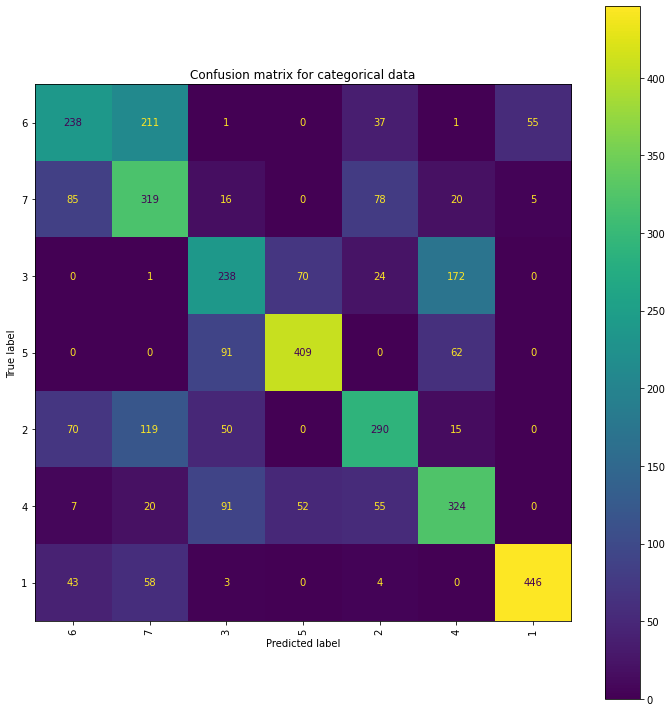

In [442]:
## Confusion 
cm = sklearn.metrics.confusion_matrix(y_pred=y_pred, y_true = y_test)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_confusion_matrix")
plt.show()

In [443]:
Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

print("AUC = ", 
      sklearn.metrics.roc_auc_score(Y_test,Y_pred,multi_class="ovo"))
print("Balanced Accuracy = ", 
      sklearn.metrics.balanced_accuracy_score(y_test,y_pred))
print("Cohen Kappa score = ", 
      sklearn.metrics.cohen_kappa_score(y_test,y_pred))
print("Matthews Corrcoef = ", 
      sklearn.metrics.matthews_corrcoef(y_test,y_pred))
print("Hinge Loss = ", sklearn.metrics.hinge_loss(y_test,Y_pred))

AUC =  0.7648917551750781
Balanced Accuracy =  0.5965142578317818
Cohen Kappa score =  0.5321802419772571
Matthews Corrcoef =  0.5335027676205927
Hinge Loss =  0.8021164021164021


<a id ="section1.3.2"></a>
[back to menu](#menu)

### 1.C.b Feature Selection

In this section, we aim tp drop the non determinant categories in input variables.

The "importance" of each categorical variable can be chosen with a simple ridge selection, as proposed [in this sklearn example](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py)

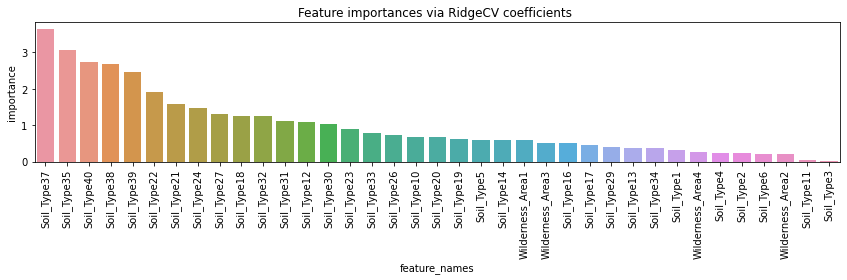

In [444]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
importance = np.abs(ridge.coef_)
feature_names = X_train.columns

tmp = pd.DataFrame(importance, index=feature_names, columns=["importance"]).reset_index()
tmp = tmp.rename({"index":"feature_names"}, axis =1)
tmp = tmp.sort_values("importance", ascending=False)

plt.figure(figsize=(12,4))
sns.barplot(y="importance", x="feature_names", data=tmp)
plt.title("Feature importances via RidgeCV coefficients ")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_importance_RidgeCV")
plt.show()

#### ANOVA + SVC
Let's compute a categorical variable selection by computing an ANOVA and git its outputs to an Support Vector Machine Classifier. 
The code is mainly copied from [this sklearn example]() 


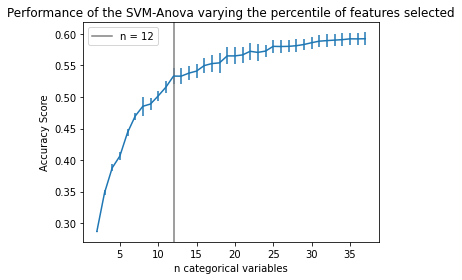

In [445]:
from sklearn.feature_selection import SelectPercentile, chi2
# from sklearn.model_selection import cross_val_score
# # #############################################################################
# # Create a feature-selection transform, a scaler and an instance of SVM that we
# # combine together to have a full-blown estimator
# clf = Pipeline(
#     [
#         ("anova", SelectPercentile(chi2)),
#         ("scaler", StandardScaler()),
#         ("svc", SVC(gamma="auto")),
#     ]
# )

# # #############################################################################
# # Plot the cross-validation score as a function of percentile of features
# score_means = list()
# score_stds = list()
# ## from 2 to nb cat vars : 
# percentiles = np.linspace(0,100, num=X_train.shape[1]+1)[2:]

# for percentile in percentiles:
#     clf.set_params(anova__percentile=percentile)
#     this_scores = cross_val_score(clf, X_train, y_train)
#     score_means.append(this_scores.mean())
#     score_stds.append(this_scores.std())
    
# with open(RES_PATH+"CV_gridsearch_models/"+"cat_feature_select_ANOVA_SVM"+".pkl", "wb") as f :
#     pickle.dump((percentiles, score_means, score_stds, this_scores), f, pickle.HIGHEST_PROTOCOL)

with open(RES_PATH+"CV_gridsearch_models/"+"cat_feature_select_ANOVA_SVM"+".pkl", "rb") as f :
    (percentiles, score_means, score_stds, this_scores) = pickle.load(f)
  
plt.figure(figsize=(5,4))
plt.errorbar(range(2,len(percentiles)+2), score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xlabel("n categorical variables")
plt.ylabel("Accuracy Score")
k = 12
plt.axvline(x=k, color="grey", label="n = "+str(k))
plt.legend()
plt.axis("tight")
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_importance_percentile")
plt.show()

In [446]:
this_scores

array([0.5978836 , 0.59611993, 0.57892416, 0.60626102, 0.58289242])

Adding the last variables doest not change much the model. Let's remove them and check the prediction : 

In [447]:
nb_keep = 12

anova = SelectPercentile(chi2, percentile = percentiles[nb_keep-2])
anova.fit(X_train, y_train)
print("removed variables :", [v for v in X_train.columns if v not in anova.get_feature_names_out()])

removed variables : ['Soil_Type1', 'Soil_Type2', 'Soil_Type5', 'Soil_Type6', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type23', 'Soil_Type24', 'Soil_Type26', 'Soil_Type27', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type37', 'Wilderness_Area2']


The removed categorical variables are thoose that appears the less. This feature selection might be biased by that... 

In [448]:
cat_selected_vars = anova.get_feature_names_out()

X_train_small = X_train[cat_selected_vars]
X_test_small = X_test[cat_selected_vars]

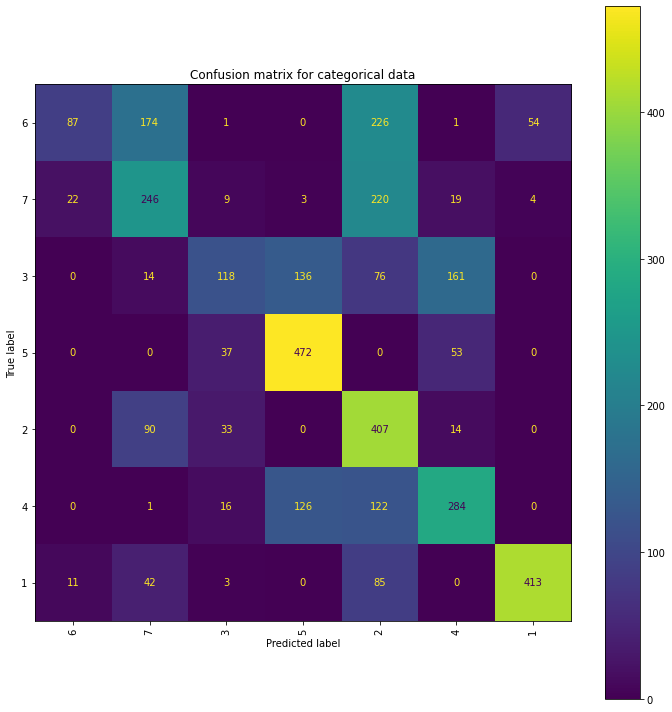

AUC =  0.72669394879767
Balanced Accuracy =  0.5307226599340586
Cohen Kappa score =  0.4582753634870822
Matthews Corrcoef =  0.4710160195069035
Hinge Loss =  0.9275132275132275


In [449]:
svm = LinearSVC(dual=False).fit(X_train_small,y_train)
y_pred = svm.predict(X_test_small)
y_pred = pd.Series(y_pred,index = y_test)

## Confusion 
cm = sklearn.metrics.confusion_matrix(y_pred=y_pred, 
                                      y_true = y_test)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_confusion_matrix_12selec")
plt.show()
Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

print("AUC = ", 
      sklearn.metrics.roc_auc_score(Y_test,Y_pred,multi_class="ovo"))
print("Balanced Accuracy = ", 
      sklearn.metrics.balanced_accuracy_score(y_test,y_pred))
print("Cohen Kappa score = ", 
      sklearn.metrics.cohen_kappa_score(y_test,y_pred))
print("Matthews Corrcoef = ", 
      sklearn.metrics.matthews_corrcoef(y_test,y_pred))
print("Hinge Loss = ", sklearn.metrics.hinge_loss(y_test,Y_pred))

As a recall, without feature selection, the result where : 
* AUC =  0.7648917551750781
* Balanced Accuracy =  0.5965142578317818
* Cohen Kappa score =  0.5321802419772571
* Matthews Corrcoef =  0.5335027676205927
* Hinge Loss =  0.8021164021164021

With this feature selection, the model tend to predict "7" for cover type "4" more often than necessary. This may not be relevant.

In [404]:
print([var for var in X_train.columns if var not in cat_selected_vars])

['Soil_Type16', 'Soil_Type19', 'Soil_Type21', 'Soil_Type27', 'Soil_Type34']


#### Selecting feature importance with tree :

Another [example sklearn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py) uses tree-based classifier methods, and compare with and without permutation of variables :


In [405]:
from sklearn.ensemble import RandomForestClassifier

feature_names = X_train.columns#[f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Elapsed time to compute the importances: 0.021 seconds


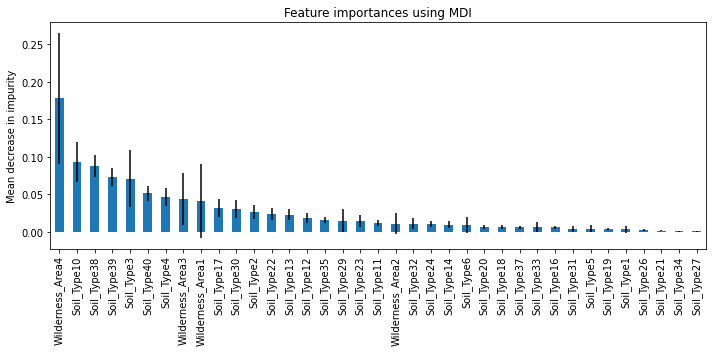

In [406]:
## Feature importance based on mean decrease in impurity
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

## plot
tmp = pd.DataFrame(importances, columns=["importance"], index=feature_names)
tmp.loc[:,"err"] = std
tmp = tmp.sort_values("importance",ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
tmp["importance"].plot.bar(yerr=tmp["err"], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


Elapsed time to compute the importances: 12.001 seconds


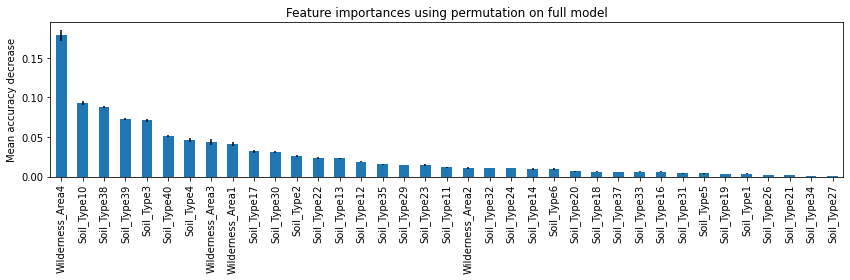

In [461]:
## Feature importance based on feature permutation
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, 
    n_repeats=10, random_state=42, n_jobs=8
    )
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(result.importances_mean, index=feature_names)

## plot
tmp = pd.DataFrame(importances,columns=["importance"], index=feature_names)
tmp.loc[:,"err"] = result.importances_std
tmp = tmp.sort_values("importance",ascending=False)

fig, ax = plt.subplots(figsize=(12,4))
tmp["importance"].plot.bar(yerr=tmp["err"], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.savefig(RES_PATH+"figures/"+"cat_importance_randomForest")
plt.show()

In [462]:
thrs = 0.01
print("dropped vars : ", tmp["importance"][tmp["importance"]< thrs].index)
print("dropped vars : ", tmp["importance"][tmp["importance"]>= thrs].index)
# X_new_feature_selection = X.loc[:, tmp["importance"][tmp["importance"]>= thrs].index]
# X_new_feature_selection.to_csv(RES_PATH+"X_cat_feature_selection.csv")

dropped vars :  Index(['Soil_Type14', 'Soil_Type6', 'Soil_Type20', 'Soil_Type18',
       'Soil_Type37', 'Soil_Type33', 'Soil_Type16', 'Soil_Type31',
       'Soil_Type5', 'Soil_Type19', 'Soil_Type1', 'Soil_Type26', 'Soil_Type21',
       'Soil_Type34', 'Soil_Type27'],
      dtype='object')
dropped vars :  Index(['Wilderness_Area4', 'Soil_Type10', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type3', 'Soil_Type40', 'Soil_Type4', 'Wilderness_Area3',
       'Wilderness_Area1', 'Soil_Type17', 'Soil_Type30', 'Soil_Type2',
       'Soil_Type22', 'Soil_Type13', 'Soil_Type12', 'Soil_Type35',
       'Soil_Type29', 'Soil_Type23', 'Soil_Type11', 'Wilderness_Area2',
       'Soil_Type32', 'Soil_Type24'],
      dtype='object')


<a id ="section1.3.3"></a>
[back to menu](#menu)

### 1.C.c Reduction of dimension : 

#### Projection in smaller space - Compare PCA, NMF and LDA :

[This example of sklearn](https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py) proposes to compare the PCA an NMF projection with the KBest feature selector (used just above)

Note that some method projecting categorical data such that [MCA](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwim84uU2p_1AhWhyIUKHdKGDGUQFnoECAQQAQ&url=http%3A%2F%2Fwww.math.u-bordeaux.fr%2F~mchave100p%2Fwordpress%2Fwp-content%2Fuploads%2F2013%2F10%2FACM-M2.pdf&usg=AOvVaw1BoiTWjdG3fKvAvAP0RAMD) would be more appropriate, but they are not proposed in sklearn. 


In [463]:
from sklearn.decomposition import LatentDirichletAllocation
pipe = Pipeline(
    [
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ('standardscaler', StandardScaler()),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 8, 10, 15, 20, 25, 30]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(init="nndsvda"), 
                       LatentDirichletAllocation()],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(chi2)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "NMF", "KBest(chi2)", "LDA"]

grid = GridSearchCV(pipe, cv=5, n_jobs=8, param_grid=param_grid)
# grid.fit(X_train, y_train)
# with open(res_path+"CV_gridsearch_models/"+"cat_reduc_dim"+".pkl", "wb") as f :
#     pickle.dump(grid, f, pickle.HIGHEST_PROTOCOL)

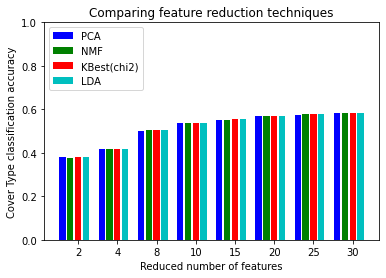

In [464]:
with open(res_path+"CV_gridsearch_models/"+"cat_reduc_dim"+".pkl", "rb") as f :
    grid= pickle.load(f)
    
mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = np.arange(len(N_FEATURES_OPTIONS)) * (len(reducer_labels) + 1) + 0.5

plt.figure()
COLORS = "bgrcmyk"
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel("Reduced number of features")
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel("Cover Type classification accuracy")
plt.ylim((0, 1))
plt.legend(loc="upper left")

plt.show()

In [465]:
grid.best_params_

{'classify__C': 10,
 'reduce_dim': PCA(iterated_power=7, n_components=30),
 'reduce_dim__n_components': 30}

In [466]:
def coeffs_on_4first_compo(X_, my_meth, palette_name = "inferno") : 
    ## fit model
    my_meth.fit(X_)
    my_meth_name = str(my_meth).split("(")[0]
    coeffs = pd.DataFrame(my_meth.components_, columns = X_.columns,
                      index = ["ax_"+str(k) for k in np.arange(1,my_meth.n_components+1)])
    
    ## init plot
    
    palette=sns.color_palette(palette_name, n_colors=int(X_.shape[1]))
    plt.subplot(1,2,1)
    for i,colname in enumerate(coeffs.columns) :
            plt.scatter(x = coeffs.loc["ax_1", colname], 
                        y = coeffs.loc["ax_2", colname],
                        label = colname, color=palette[i],
                        marker="x"
                        )
    plt.xlabel("coeff axis 1")
    plt.ylabel("coeff axis 2")
    plt.title(my_meth_name+" on categorical data \nAxis 1 and 2",fontsize=14)
    plt.legend("",frameon=False)

    plt.subplot(1,2,2)
    for i,colname in enumerate(coeffs.columns) :
        plt.scatter(x = coeffs.loc["ax_3", colname], 
                    y = coeffs.loc["ax_4", colname],
                    label = colname, color=palette[i],
                    marker="x"
                    )
    plt.xlabel("coeff axis 3")
    plt.ylabel("coeff axis 4")
    my_meth_name = str(my_meth).split("(")[0]
    plt.title(my_meth_name+" on categorical data \nAxis 3 and 4",fontsize=14)
    plt.legend(title="X variables", bbox_to_anchor=(1, 1), ncol=3)

In [467]:
def coeffs_on_1_to_4_compo(X_, my_meth, n_4axis=[1,2,3,4], palette_name = "inferno") : 
    
    ## fit model
    my_meth.fit(X_)
    my_meth_name = str(my_meth).split("(")[0]
    coeffs = pd.DataFrame(my_meth.components_, columns = X_.columns,
                      index = ["ax_"+str(k) for k in np.arange(1,my_meth.n_components+1)])
    
    ## init plot
    
    palette=sns.color_palette(palette_name, n_colors=int(X_.shape[1]))
    plt.subplot(1,2,1)
    for i,colname in enumerate(coeffs.columns) :
            plt.scatter(x = coeffs.loc["ax_"+str(n_4axis[0]), colname], 
                        y = coeffs.loc["ax_"+str(n_4axis[1]), colname],
                        label = colname, color=palette[i],
                        marker="x"
                        )
    plt.xlabel("coeff axis"+str(n_4axis[0]))
    plt.ylabel("coeff axis"+str(n_4axis[0]))
    my_title = str(my_meth_name+" on categorical data \nAxis "+str(n_4axis[0])+
                  " and "+str(n_4axis[1]))
    plt.title(my_title,fontsize=14)
    plt.legend("",frameon=False)

    plt.subplot(1,2,2)
    for i,colname in enumerate(coeffs.columns) :
        plt.scatter(x = coeffs.loc["ax_"+str(n_4axis[2]), colname], 
                    y = coeffs.loc["ax_"+str(n_4axis[3]), colname],
                    label = colname, color=palette[i],
                    marker="x"
                    )
    plt.xlabel("coeff axis "+str(n_4axis[2]))
    plt.ylabel("coeff axis "+str(n_4axis[3]))
    my_meth_name = str(my_meth).split("(")[0]
    my_title = str(my_meth_name+" on categorical data \nAxis "+str(n_4axis[2])+
              " and "+str(n_4axis[3]))
    plt.title(my_title,fontsize=14)
    plt.legend(title="X variables", bbox_to_anchor=(1, 1), ncol=3)

In [468]:
def print_projection_on_axes(X_proj, my_meth_name, labels):
    plt.subplot(1,2,1)
    for cover_type in labels.unique():
        idx = labels[labels == cover_type].index
        plt.scatter(x=X_proj.loc[idx,"ax_1"], y=X_proj.loc[idx,"ax_2"], 
                     alpha = 0.5, marker="x", 
                     label = str(cover_type)
                   )
    plt.legend("", frameon=False)
    plt.title("Forests on " + my_meth_name + " axis 1 and 2", fontsize=14)
    plt.xlabel(my_meth_name + " axis 1")
    plt.ylabel(my_meth_name + " axis 2")

    plt.subplot(1,2,2)
    for cover_type in labels.unique():
        idx = labels[labels == cover_type].index
        plt.scatter(x=X_proj.loc[idx,"ax_3"], y=X_proj.loc[idx,"ax_4"], 
                     alpha = 0.5, marker="x", 
                     label = str(cover_type)
                   )
    plt.legend(title="Cover Type", bbox_to_anchor=(1, 1))
    plt.title("Forests on " + my_meth_name + " axis 3 and 4", fontsize=14)
    plt.xlabel(my_meth_name + " axis 3")
    plt.ylabel(my_meth_name + " axis 4")

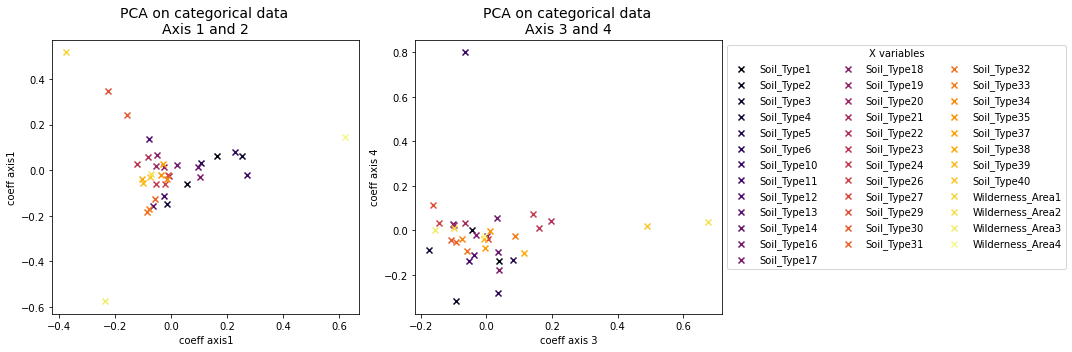

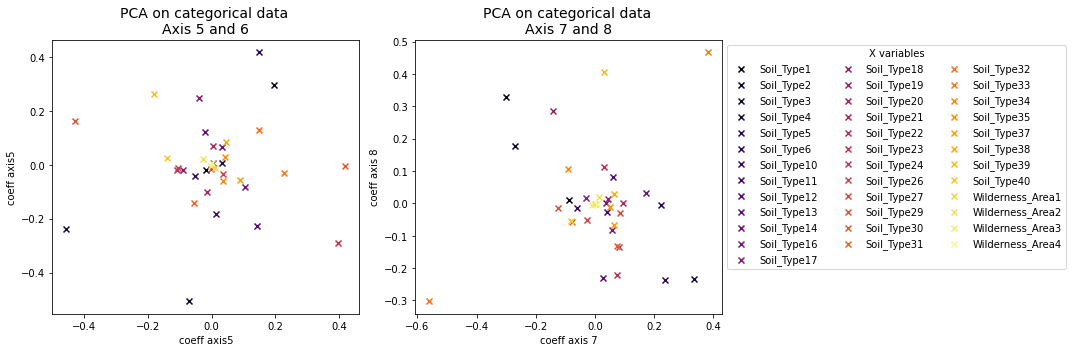

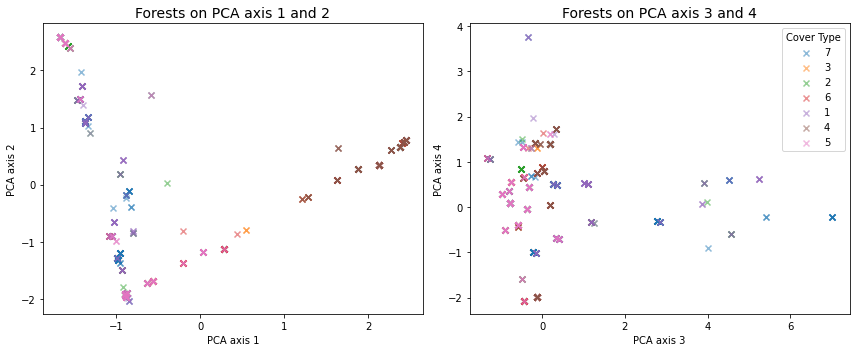

In [476]:
# Xtmp = X_train.copy()
# Xtmp[Xtmp == 0] = -1
X_ = StandardScaler().fit_transform(X_train)
X_ = pd.DataFrame(X_, index=X_train.index, columns=X_train.columns)
my_meth = PCA(n_components=8).fit(X_)
my_meth_name = "PCA"
plt.figure(figsize=(15,5))
coeffs_on_1_to_4_compo(X_, my_meth)
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_PCA_coeff_4axis")
plt.show()

plt.figure(figsize=(15,5))
coeffs_on_1_to_4_compo(X_, my_meth, [5,6,7,8])
plt.tight_layout()
plt.savefig(RES_PATH+"figures/cat_PCA_coeff_8axis")
plt.show()

X_proj = pd.DataFrame(my_meth.transform(X_), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,my_meth.n_components+1)])
X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, my_meth_name, labels)
plt.tight_layout()
plt.show()

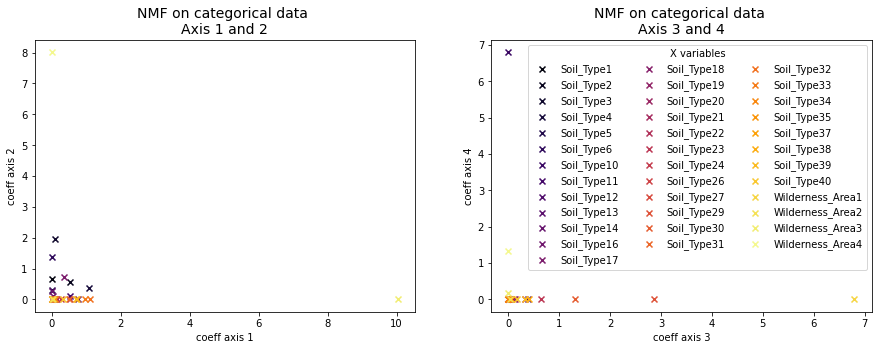

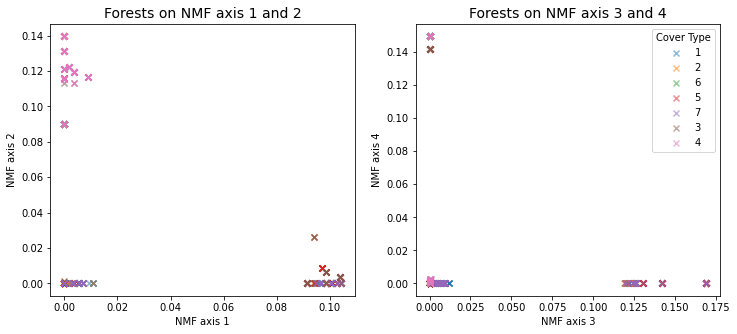

In [454]:
my_meth = NMF(init="nndsvda", n_components=4)
plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_train, my_meth)
plt.show()

## project on 4 axis an color with output classif
X_proj = pd.DataFrame(my_meth.transform(X_train), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])

X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, "NMF", labels)
plt.show()

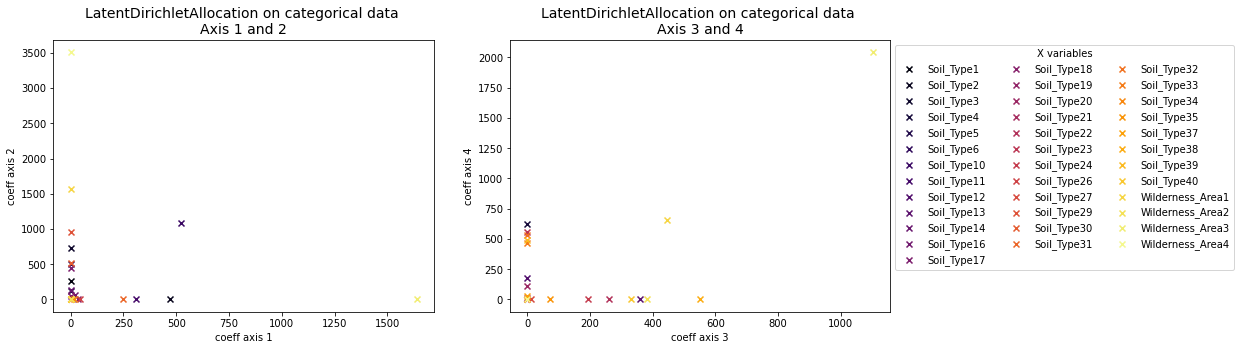

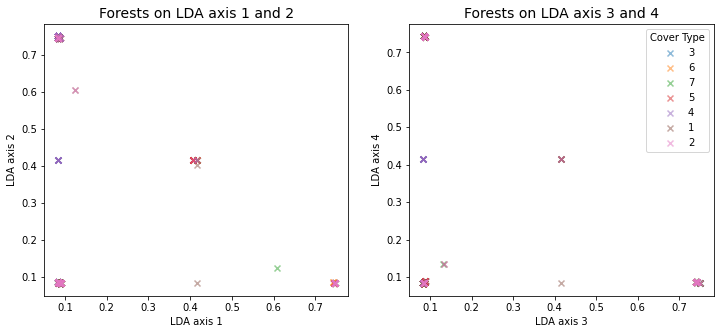

In [888]:
my_meth = LatentDirichletAllocation(n_components=4)
plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_train, my_meth)
plt.show()

## project on 4 axis an color with output classif
X_proj = pd.DataFrame(my_meth.transform(X_train), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])

X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, "LDA", labels)
plt.show()

<!-- Ces méthodes de projection n'ont pas l'air de bien séparer les classes de sols. Vu que les dimensions sont petites, on restera juste avec les variables numériques. Autres idées pour réduire la dimension : 
Lancer une ANOVA "cover_type $\sim$ numerical_var" pour voir comment les chemins de régularisation évoluent. Cela permettrait de répondre à la question "est ce que la variable numérique sépare bien les classes de la variable catégorielle" -->

These projection methods do not seem to separate the soil classes well. Since the dimensions are small, we will just stay with the numerical variables. 

Let's check the classification from PCA projection with best n_composants, that is 20 : 

In [485]:
n_compo = 20
X_ = X.loc[:,cat_vars]
X_std = StandardScaler().fit_transform(X_)
X_proj = PCA(n_components=n_compo).fit_transform(X_std)
X_proj = pd.DataFrame(X_proj, index = X.index,
                     columns=["ax_"+ str(k+1) for k in range(n_compo)])
X_train_small = X_proj.loc[train_index,:]
X_test_small = X_proj.loc[test_index,:]

# X_proj.to_csv(RES_PATH+"X_cat_PCA20.csv")

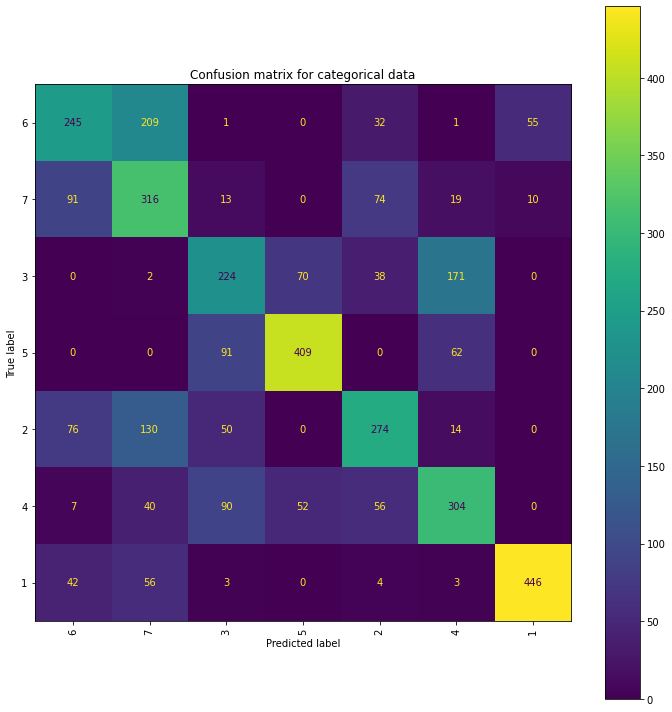

AUC =  0.7577069728080443
Balanced Accuracy =  0.5841700860085243
Cohen Kappa score =  0.5179808941366408
Matthews Corrcoef =  0.5194349233290855
Hinge Loss =  0.8264550264550264


In [486]:
svm = LinearSVC(dual=False).fit(X_train_small,y_train)
y_pred = svm.predict(X_test_small)
y_pred = pd.Series(y_pred,index = y_test)

## Confusion 
cm = sklearn.metrics.confusion_matrix(y_pred=y_pred, 
                                      y_true = y_test)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(cm)

fig, ax = plt.subplots(1,1,figsize=(10,10))
cm_display.plot(ax=ax)
ax.set_title("Confusion matrix for categorical data")
ax.set_xticklabels(y_train.unique(), rotation = 90)#[])
ax.set_yticklabels(y_train.unique())
plt.savefig(res_path+"figures/confusion_matrix_cat_ANOVA")
plt.tight_layout()
plt.show()
Y_test = pd.get_dummies(y_test)
Y_pred = pd.get_dummies(y_pred)

print("AUC = ", 
      sklearn.metrics.roc_auc_score(Y_test,Y_pred,multi_class="ovo"))
print("Balanced Accuracy = ", 
      sklearn.metrics.balanced_accuracy_score(y_test,y_pred))
print("Cohen Kappa score = ", 
      sklearn.metrics.cohen_kappa_score(y_test,y_pred))
print("Matthews Corrcoef = ", 
      sklearn.metrics.matthews_corrcoef(y_test,y_pred))
print("Hinge Loss = ", sklearn.metrics.hinge_loss(y_test,Y_pred))

Comparison before/after : 

before


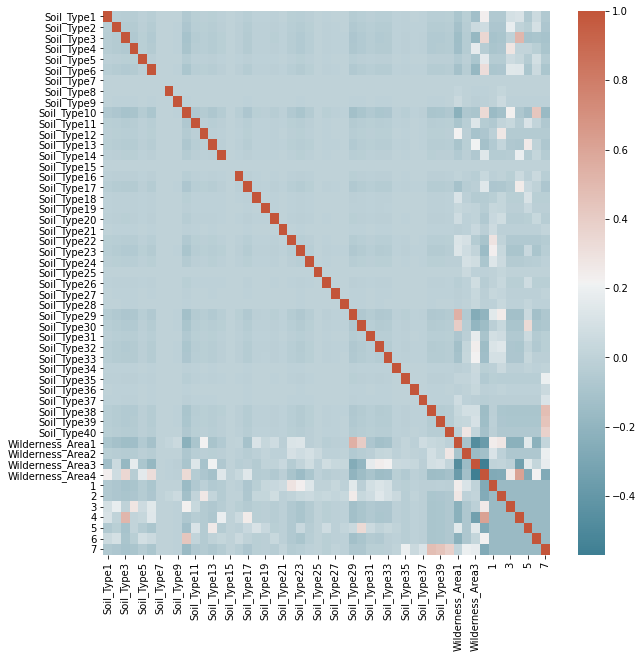

Feature selection : 


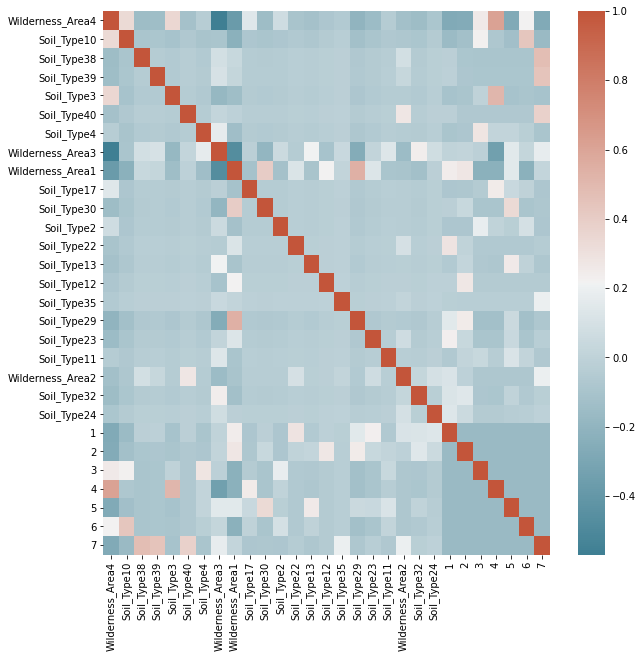

PCA projection (20) :


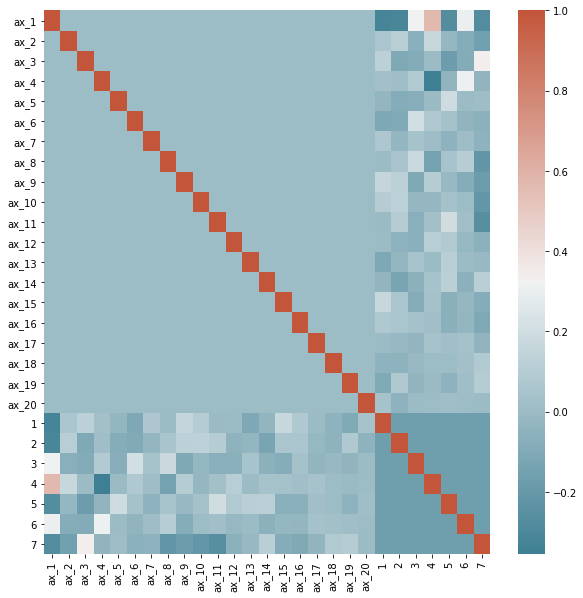

In [487]:
print("before")
tmp = pd.concat((X.loc[:,cat_vars],pd.get_dummies(y)), axis =1)
corr = tmp.corr().fillna(0)
# cg = sns.clustermap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# cg.ax_row_dendrogram.set_visible(False)
plt.figure(figsize=(10,10))
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

print("Feature selection : ")
X_new_feature_selection = pd.read_csv(RES_PATH+"X_cat_feature_selection.csv", index_col=0)
tmp = pd.concat((X_new_feature_selection,pd.get_dummies(y)), axis =1)
corr = tmp.corr().fillna(0)
# cg = sns.clustermap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# cg.ax_row_dendrogram.set_visible(False)
plt.figure(figsize=(10,10))
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

## PCA Cat projection : 
print("PCA projection ("+ str(n_compo)+") :", )
X_proj = pd.read_csv(RES_PATH+"X_cat_PCA20.csv", index_col=0)
tmp = pd.concat((X_proj,pd.get_dummies(y)), axis =1)
corr = tmp.corr()
# cg = sns.clustermap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# cg.ax_row_dendrogram.set_visible(False)
plt.figure(figsize=(10,10))
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

possible improvments here :
* target Encoding : https://contrib.scikit-learn.org/category_encoders/targetencoder.html // https://maxhalford.github.io/blog/target-encoding/

<a id ="section2"></a>
<a id ="section2.1"></a>

[back to menu](#menu)

# 2. Exploratory Analysis for Numerical data 
Let's now tackle the 10 numerical variables : 

## 2.1 Univariate analysis

In [488]:
X_num = X.loc[:,num_vars]
X_numy = pd.concat((X_num, y), axis = 1)

X_num.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [489]:
palette = sns.color_palette("tab10", len(y.unique()))
# sns.pairplot(X_numy, hue = "Cover_Type", palette = palette, kind="kde")
# plt.savefig(RES_PATH + "figures/"+"pairplot_kde_colored_by_output")
# sns.pairplot(X_num)
# plt.savefig(RES_PATH + "figures/"+"pairplot")
plt.show()

<a id ="section2.2"></a>
[back to menu](#menu)
## 2.B Multivariate analysis

In [490]:
my_std = StandardScaler().fit(X_num)
X_num_std = pd.DataFrame(my_std.transform(X_num), index=X_num.index, columns=X_num.columns)

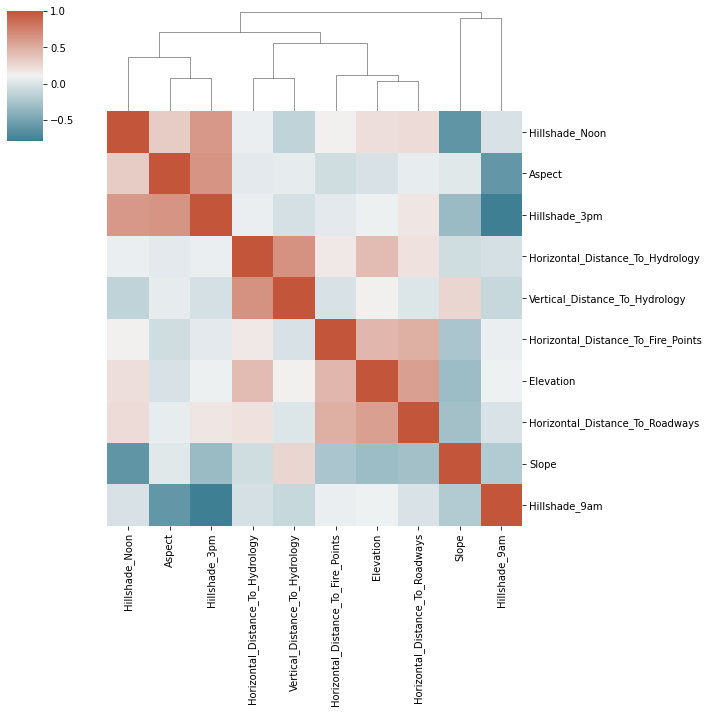

In [507]:
corr_std = X_num_std.corr()
cg = sns.clustermap(corr_std, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
cg.ax_row_dendrogram.set_visible(False)
plt.savefig(RES_PATH + "figures/"+"num_correlation_matrix")


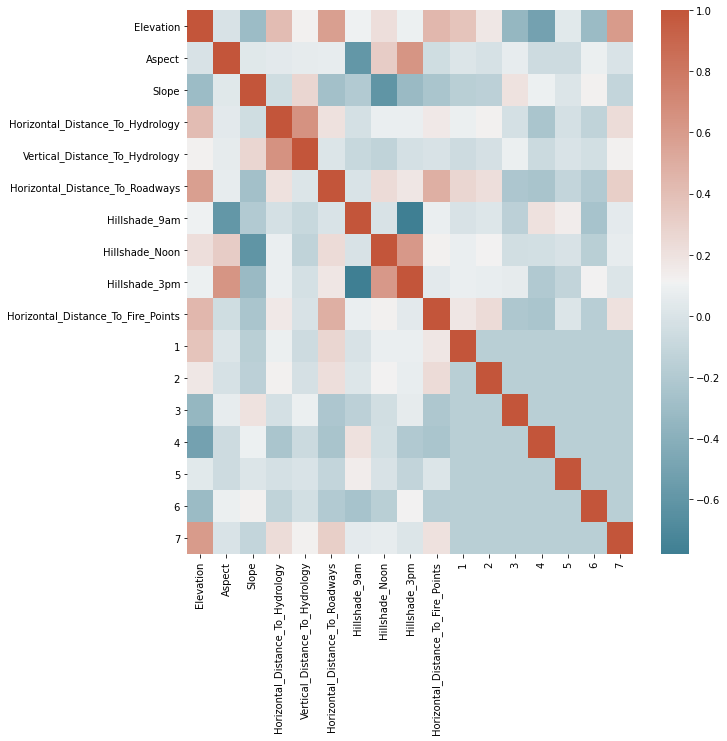

In [508]:
plt.figure(figsize=(10,10))
corr_std =(pd.concat((X_num,pd.get_dummies(y)), axis =1)).corr()
sns.heatmap(corr_std, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
plt.savefig(RES_PATH + "figures/"+"num_correlation_matrix_with_dummies")


In [509]:
num_vars

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

Some variables are correlated and anti-correlated. A selection of variables will be mandatory. 
### Numerical VS output : 

In [510]:
def eta_squared(cat_var,num_var):
    global_mean = num_var.mean()
    modes = []
    for j in cat_var.unique():
        num_in_j = num_var[cat_var==j]
        modes.append({'ni': len(num_in_j),
                        'mode_mean': num_in_j.mean()})
    SCT = sum([(num_in_j-global_mean)**2 for num_in_j in num_var])
    SCE = sum([c['ni']*(c['mode_mean']-global_mean)**2 for c in modes])
    return SCE/SCT

Hillshade_Noon


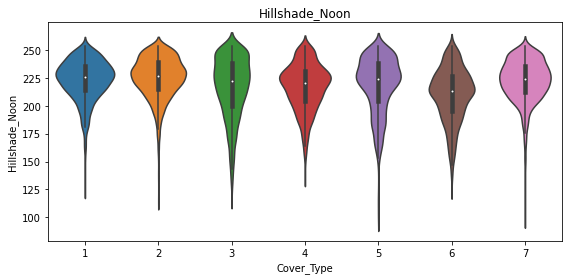

ANOVA $\eta^2$ =  0.04474456007955787
Aspect


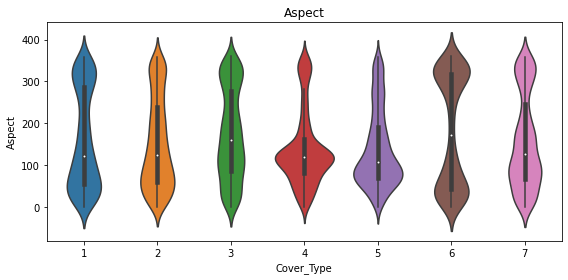

ANOVA $\eta^2$ =  0.018813757646954372
Hillshade_3pm


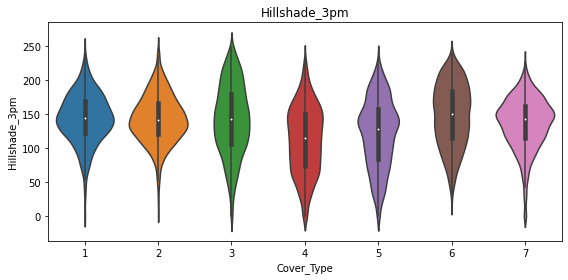

ANOVA $\eta^2$ =  0.07281154853882023
Horizontal_Distance_To_Hydrology


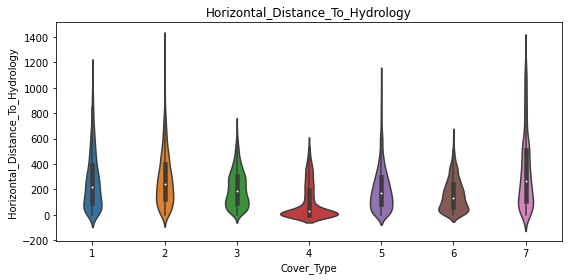

ANOVA $\eta^2$ =  0.12985568777310916
Vertical_Distance_To_Hydrology


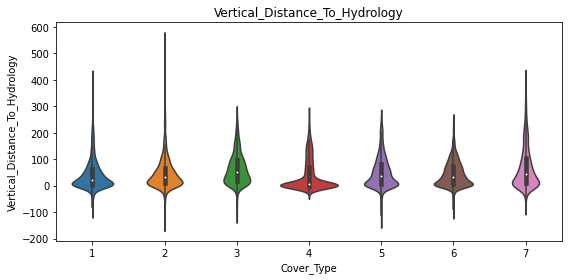

ANOVA $\eta^2$ =  0.02881593654802337
Horizontal_Distance_To_Fire_Points


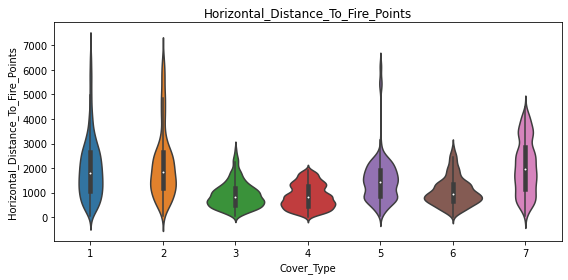

ANOVA $\eta^2$ =  0.2285250213910938
Elevation


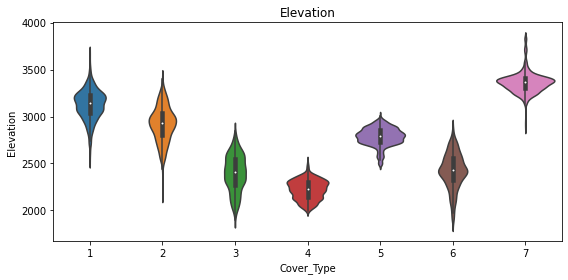

ANOVA $\eta^2$ =  0.8657343078655694
Horizontal_Distance_To_Roadways


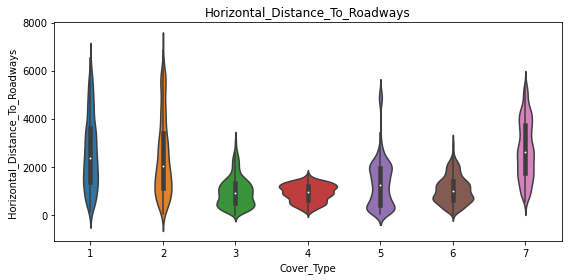

ANOVA $\eta^2$ =  0.3268578045235361
Slope


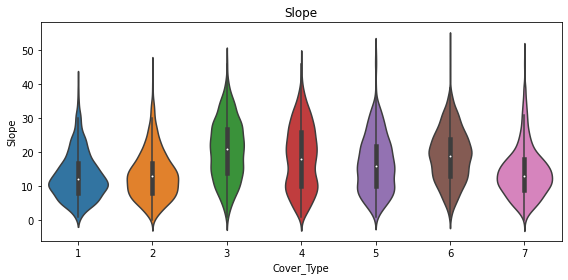

ANOVA $\eta^2$ =  0.10701277568309729
Hillshade_9am


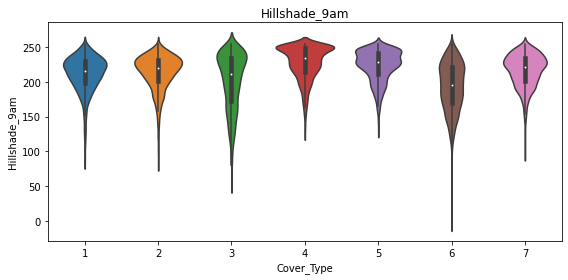

ANOVA $\eta^2$ =  0.13055356928190062


In [514]:
eta_num = pd.Series(float)
for num_v in X_num_std.columns[cg.dendrogram_col.reordered_ind] : 
    print(num_v)
    plt.figure(figsize=(8,4))
    sns.violinplot(y = num_v, x = "Cover_Type", data = X_numy)
#     plt.yscale("log")
    plt.title(num_v)
    plt.tight_layout()
    plt.savefig(RES_PATH+"figures/num_ANOVA_"+num_v)
    plt.show()
    eta = eta_squared(y, X_num.loc[:,num_v])
    print("ANOVA $\eta^2$ = ",eta)
    eta_num.loc[num_v] = eta 

In [515]:
eta_num

0                                     <class 'float'>
Hillshade_Noon                               0.044745
Aspect                                       0.018814
Hillshade_3pm                                0.072812
Horizontal_Distance_To_Hydrology             0.129856
Vertical_Distance_To_Hydrology               0.028816
Horizontal_Distance_To_Fire_Points           0.228525
Elevation                                    0.865734
Horizontal_Distance_To_Roadways              0.326858
Slope                                        0.107013
Hillshade_9am                                0.130554
dtype: object

The variable "Elevation" seems to separate the soil covers well. The other variables do not seem to be discriminating.

<a id ="section2.3"></a>
<a id ="section2.3.1"></a>
[back to menu](#menu)

## 2.C Feature Engineering

Let's follow the same methodology, adapted to numerical features : 
<!-- * https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py -->


### 2.C.a Classical preprocess

#### Drop constant variables :
First of all, let's check the standard deviation of each variable : 

In [601]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1))
sel.fit(X_num)
len(sel.get_feature_names_out())

10

There are no not-variant variable. 

#### Train test split : 
The numerical data have already been center-reduced (before correlation matrix heatmap). 
Let's split data for feature engineering of numerical variables :

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X_num_std, y, random_state=10)
## same random state to be consistent with the first part :) 

#### A classifier predictor of cover type 
To follow the evolution of prediction while engineering feature, we will need a basic model (to be improved) 

<!-- <a id ="section2.3.2"></a>
[back to menu](#menu) -->

### 1.C.b Feature Selection : 

Let's call again the [Feature selection User Guide of sklearn](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection). As we now tackle numerical data, we can call the RFE sklearn process for feature selection : 

#### Feature selection with RFE :

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py


Optimal number of features : 24


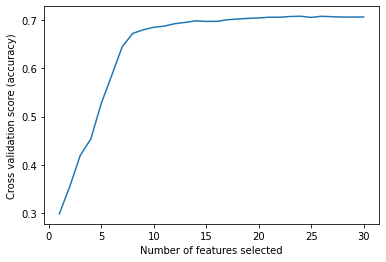

In [103]:
## https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(4),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
mean_score = rfecv.cv_results_["mean_test_score"]
plt.plot(
    range(min_features_to_select, len(mean_score) + min_features_to_select),
    mean_score
)
plt.show()

In [101]:
# chi2, f_classif
anova_filter = SelectKBest(f_classif, k=3)
clf = LinearSVC(dual=False)
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k=3)),
                ('linearsvc', LinearSVC(dual=False))])

In [102]:
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=True))


              precision    recall  f1-score   support

           1       0.43      0.34      0.38       537
           2       0.41      0.37      0.39       529
           3       0.38      0.40      0.39       551
           4       0.51      0.91      0.65       528
           5       0.56      0.51      0.54       552
           6       0.43      0.10      0.16       560
           7       0.70      0.97      0.81       523

    accuracy                           0.51      3780
   macro avg       0.49      0.51      0.47      3780
weighted avg       0.49      0.51      0.47      3780



<!-- <a id ="section2.3.2"></a>
[back to menu](#menu)

### 1.C.c Reduction of dimension :  -->

<a id ="section2.3.2"></a>
[back to menu](#menu)

### 1.C.b Reduction of dimension : 

[Factor Analysis example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html#sphx-glr-auto-examples-decomposition-plot-varimax-fa-py), and [an article](https://www.datacamp.com/community/tutorials/introduction-factor-analysis) to read about FA.

In [589]:
from sklearn.cluster import FeatureAgglomeration
from sklearn.decomposition import FactorAnalysis

pipe = Pipeline(
    [
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 6, 8, 10]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(),  FactorAnalysis()],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [FeatureAgglomeration()],
        "reduce_dim__n_clusters": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(f_classif)], ## chi2 need non neg matrix
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "FA", "hclust", "KBest(chi2)"]

grid = GridSearchCV(pipe, cv=5, n_jobs=8, param_grid=param_grid)
# grid.fit(X_train, y_train)
# with open(res_path+"CV_gridsearch_models/"+"num_reduc_dim"+".pkl", "wb") as f :
#     pickle.dump(grid, f, pickle.HIGHEST_PROTOCOL)

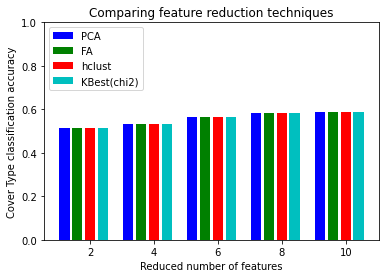

In [590]:

with open(res_path+"CV_gridsearch_models/"+"num_reduc_dim"+".pkl", "rb") as f :
    grid= pickle.load(f)

    
mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = np.arange(len(N_FEATURES_OPTIONS)) * (len(reducer_labels) + 1) + 0.5

plt.figure()
COLORS = "bgrcmyk"
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel("Reduced number of features")
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel("Cover Type classification accuracy")
plt.ylim((0, 1))
plt.legend(loc="upper left")

plt.show()

Les projections par pondération : 

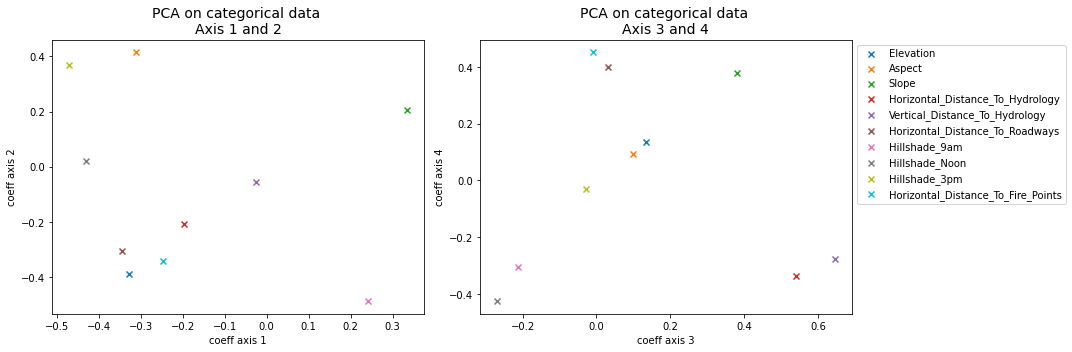

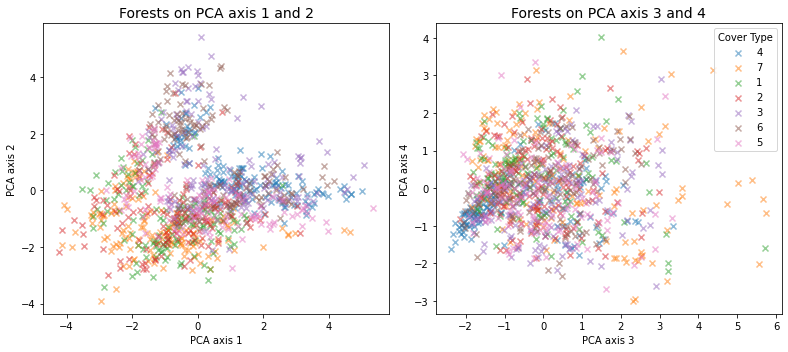

In [620]:
X_ = StandardScaler().fit_transform(X_train)
X_ = pd.DataFrame(X_, index=X_train.index, columns=X_train.columns)
my_meth = PCA(n_components=4).fit(X_)
my_meth_name = "PCA"
# my_meth = FactorAnalysis(n_components=4).fit(X_)
# my_meth_name = "FA"

plt.figure(figsize=(15,5))
coeffs_on_4first_compo(X_, my_meth, palette_name = "tab10")
plt.legend(ncol=1, bbox_to_anchor= (1,1))
plt.tight_layout()
plt.show()


X_proj = pd.DataFrame(my_meth.transform(X_), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,5)])
X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, my_meth_name, labels)
plt.tight_layout()
plt.show()

In [631]:
hclust = FeatureAgglomeration(n_clusters=4).fit(X_train)
for k in range(4) :
    idx_bool = hclust.labels_ == k
    print(k, my_meth.feature_names_in_[idx_bool])

0 ['Slope' 'Horizontal_Distance_To_Hydrology'
 'Vertical_Distance_To_Hydrology']
1 ['Aspect' 'Hillshade_Noon' 'Hillshade_3pm']
2 ['Elevation' 'Horizontal_Distance_To_Roadways'
 'Horizontal_Distance_To_Fire_Points']
3 ['Hillshade_9am']


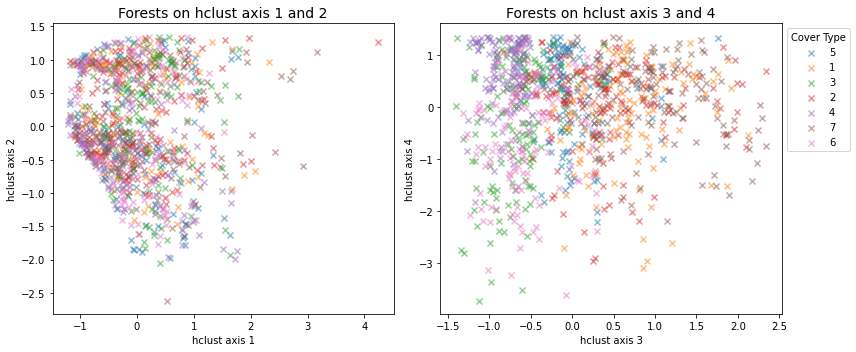

In [649]:
X_proj = pd.DataFrame(index=X_train.index)
for k in range(4) :
    idx_bool = hclust.labels_ == k
    cluster_vars = my_meth.feature_names_in_[idx_bool]
    X_proj.loc[:,"ax_"+str(k+1)] = X_train.loc[:, cluster_vars].mean(axis=1)
X_proj = X_proj.sample(1000)
labels = y.loc[X_proj.index]
plt.figure(figsize=(12,5))
print_projection_on_axes(X_proj, "hclust", labels)
plt.tight_layout()
plt.show()

<a id ="section2.3.3"></a>
[back to menu](#menu)

## 2.C.c Create variable "by hand"

The result of these projections are not satisfactory because too much information is lost. For example, the variable "elevation" separates the soils very well, it should not be noisy by weighting it with other variables. On the other hand, it is quite natural to create some variables from existing ones. For example, it is not so much the level of sunshine that discriminates the soil classes, but the difference in sunshine during the same day. 


dt_shade_9am-Noon
ANOVA $\eta^2$ =  0.06401793162107874
dt_shade_Noon-3pm
ANOVA $\eta^2$ =  0.12735474246867062
dt_shade_3pm-9am
ANOVA $\eta^2$ =  0.09681744773120823


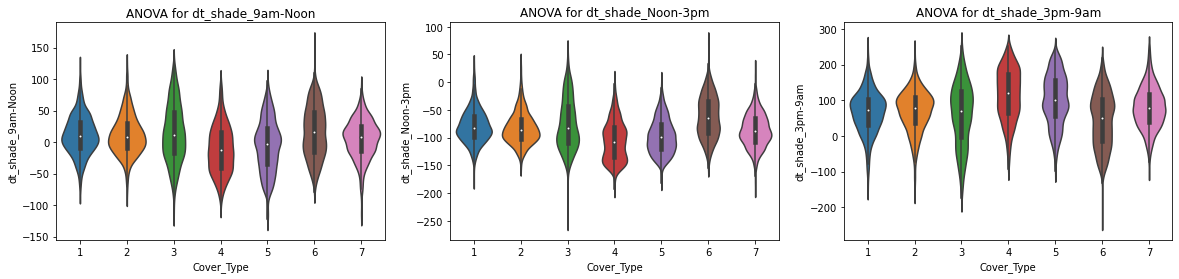

Hillshade_Noon
ANOVA $\eta^2$ =  0.04474456007955787
Hillshade_3pm
ANOVA $\eta^2$ =  0.07281154853882023
Hillshade_9am
ANOVA $\eta^2$ =  0.13055356928190062


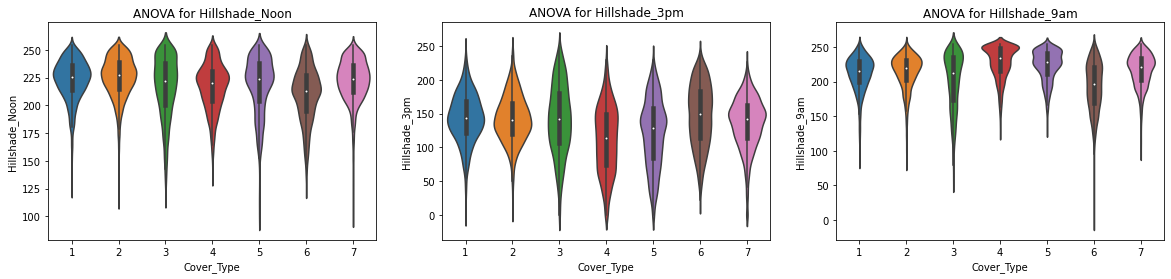

In [183]:
shade = X.loc[:,["Hillshade_9am","Hillshade_Noon", "Hillshade_3pm","Hillshade_9am"]]
shade_delta = shade.diff(axis=1).iloc[:,1:]
shade_delta.loc[:,"Cover_Type"] = y.loc[shade_delta.index]
shade_delta.loc[:,"Slope"] = X.loc[:,"Slope"]
shade_delta.loc[:,"Aspect"] = X.loc[:,"Aspect"]

shade_delta = shade_delta.rename({"Hillshade_Noon": "dt_shade_9am-Noon","Hillshade_3pm" : "dt_shade_Noon-3pm",
                                  "Hillshade_9am": "dt_shade_3pm-9am"}, axis=1)
tmp = ["dt_shade_9am-Noon","dt_shade_Noon-3pm","dt_shade_3pm-9am"]
plt.figure(figsize=(20,4))
for i in range(3) :
    num_v = tmp[i]
    plt.subplot(1,3,i+1)
    sns.violinplot(y = num_v, x = "Cover_Type", data = shade_delta)
    plt.title("ANOVA for "+ num_v)
    print(num_v)
    print("ANOVA $\eta^2$ = ",  eta_squared(y,shade_delta.loc[:,num_v]))
plt.show()

plt.figure(figsize=(20,4))
tmp2 = ["Hillshade_Noon", "Hillshade_3pm", "Hillshade_9am"]
for i in range(3) :
    num_v = tmp2[i]
    plt.subplot(1,3,i+1)
    sns.violinplot(y = num_v, x = "Cover_Type", data = X_numy)
    plt.title("ANOVA for "+ num_v)
    print(num_v)
    print("ANOVA $\eta^2$ = ",  eta_squared(y,X_numy.loc[:,num_v]))
plt.show()

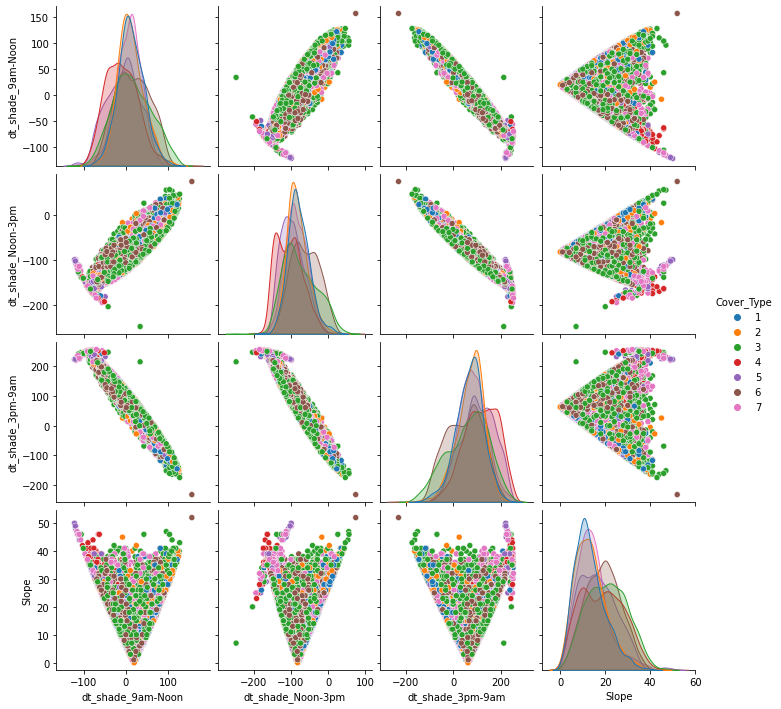

In [38]:
palette = sns.color_palette("tab10", 7)
sns.pairplot(shade_delta, hue="Cover_Type", palette = palette)

These are therefore variables that do not separate the classes well. There is no point in managing so many of them:

ANOVA $\eta^2$ =  0.10123569092567382
ANOVA $\eta^2$ =  0.06564278961293911


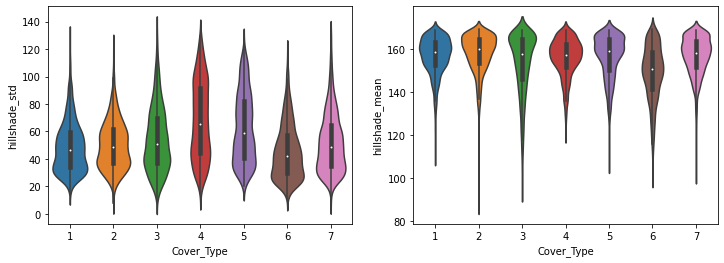

In [181]:
shade = X.loc[:,["Hillshade_9am","Hillshade_Noon", "Hillshade_3pm"]]
shade.loc[:,"hillshade_std"] = shade.std(axis=1)
shade.loc[:,"hillshade_mean"] = shade.mean(axis=1)
shade.loc[:,"Cover_Type"] = y
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.violinplot(y = "hillshade_std", x = "Cover_Type", data = shade)
plt.subplot(1,2,2)
sns.violinplot(y = "hillshade_mean", x = "Cover_Type", data = shade)
print("ANOVA $\eta^2$ = ",  eta_squared(y,shade.loc[:,"hillshade_std"]))
print("ANOVA $\eta^2$ = ",  eta_squared(y,shade.loc[:,"hillshade_mean"]))

Slope  ANOVA $\eta^2$ =  0.10701277568309729
Elevation  ANOVA $\eta^2$ =  0.8657343078655694
Aspect  ANOVA $\eta^2$ =  0.018813757646954372


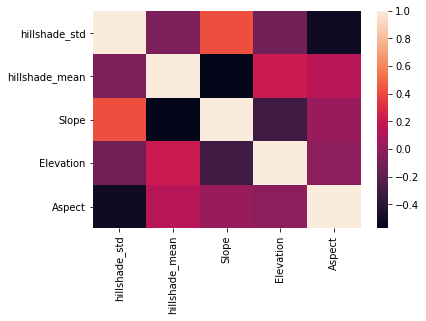

,hillshade_std,hillshade_mean,Slope,Elevation,Aspect
hillshade_std,1.000000,-0.072594,0.419209,-0.121928,-0.514570
hillshade_mean,-0.072594,1.000000,-0.573681,0.208026,0.144916
Slope,0.419209,-0.573681,1.000000,-0.312640,0.028148
Elevation,-0.121928,0.208026,-0.312640,1.000000,-0.011096
Aspect,-0.514570,0.144916,0.028148,-0.011096,1.000000


In [182]:
shade.loc[:,"Slope"] = X.loc[:,"Slope"]
shade.loc[:,"Elevation"] = X.loc[:,"Elevation"]
shade.loc[:,"Aspect"] = X.loc[:,"Aspect"]

for var in ["Slope","Elevation","Aspect"] :
    print(var, " ANOVA $\eta^2$ = ",  eta_squared(y,shade.loc[:,var]))
plt.show()

sns.heatmap(shade[["hillshade_std","hillshade_mean","Slope","Elevation","Aspect"]].corr())
plt.show()
shade[["hillshade_std","hillshade_mean","Slope","Elevation","Aspect"]].corr()

The Slope variable is very strongly correlated to the new variable created. I don't keep it. Same for Aspect variable. 

Also, it is not the horizontal and vertical distance that will be of interest, but the total distance and the variation between the horizontal and vertical component:

tot_dist
ANOVA $\eta^2$ =  0.15993331300833433
h_dist
ANOVA $\eta^2$ =  0.12985568777310916
quotient_v_h
ANOVA $\eta^2$ =  0.18674415354887325
water_above
ANOVA $\eta^2$ =  0.010713147072353506


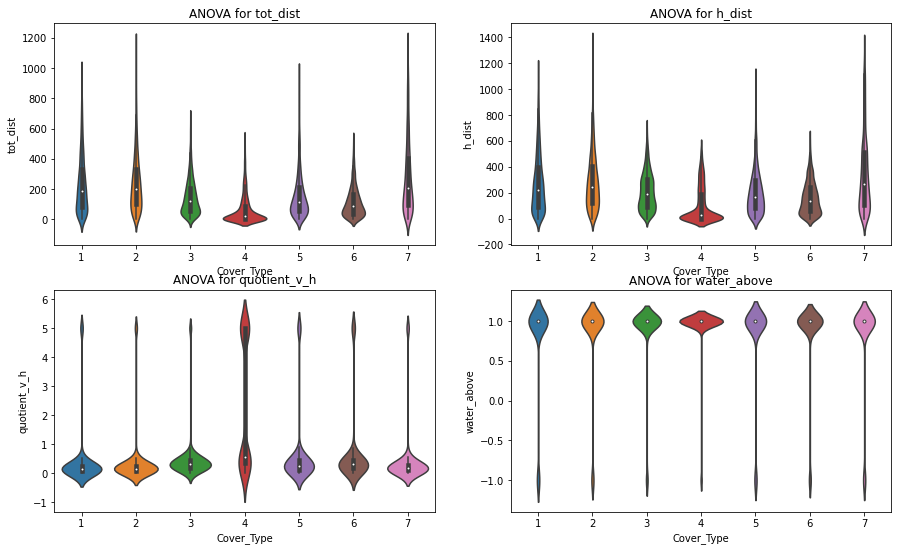

Vertical_Distance_To_Hydrology
ANOVA $\eta^2$ =  0.02881593654802337
Horizontal_Distance_To_Hydrology
ANOVA $\eta^2$ =  0.12985568777310916


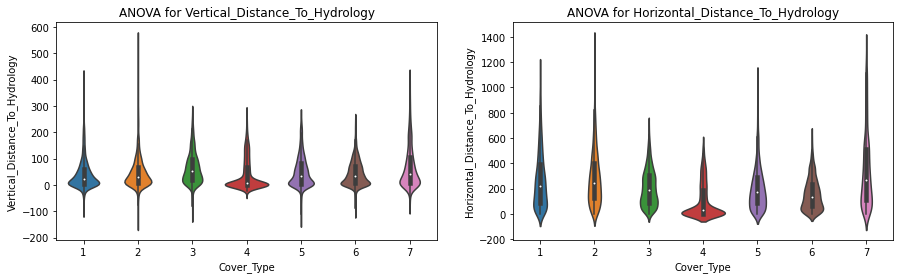

In [179]:
v = X_num.loc[:, "Vertical_Distance_To_Hydrology"]
h = X_num.loc[:, "Horizontal_Distance_To_Hydrology"]

hydrology = pd.DataFrame(abs(v - h), columns=["tot_dist"])
hydrology.loc[:,"h_dist"] = h

## quotient h/v :
hydrology.loc[:,"quotient_v_h"] = abs(v/h)
hydrology.loc[:,"quotient_v_h"] = hydrology.loc[:,"quotient_v_h"].fillna(5)

## are hydrology nearest point above or below ?
tmp = pd.Series(1, index=v.index)
tmp[v[v<0].index] = -1
hydrology.loc[:,"water_above"] = tmp
tmp = hydrology.columns

## add output :
hydrology.loc[:,"Cover_Type"] = y

## plot 
plt.figure(figsize=(15,9))
for i in range(4) :
    num_v = tmp[i]
    plt.subplot(2,2,i+1)
    sns.violinplot(y = num_v, x = "Cover_Type", data = hydrology)
    plt.title("ANOVA for "+ num_v)
    print(num_v)
    print("ANOVA $\eta^2$ = ",  eta_squared(y,hydrology.loc[:,num_v]))
plt.show()

plt.figure(figsize=(15,4))
tmp2 = ["Hillshade_Noon", "Hillshade_3pm", "Hillshade_9am"]
for i in range(2) :
    num_v = ["Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Hydrology"][i]
    plt.subplot(1,2,i+1)
    sns.violinplot(y = num_v, x = "Cover_Type", data = X_numy)
    plt.title("ANOVA for "+ num_v)
    print(num_v)
    print("ANOVA $\eta^2$ = ",  eta_squared(y,X_numy.loc[:,num_v]))
plt.show()

Only the variable "horizontal distance" will be kept, because it separates the classes better. It is renamed d_hydro 

Horizontal_Distance_To_Roadways  ANOVA $\eta^2$ =  0.3268578045235361
Horizontal_Distance_To_Fire_Points  ANOVA $\eta^2$ =  0.2285250213910938
Elevation  ANOVA $\eta^2$ =  0.8657343078655694
Horizontal_Distance_To_Hydrology  ANOVA $\eta^2$ =  0.12985568777310916


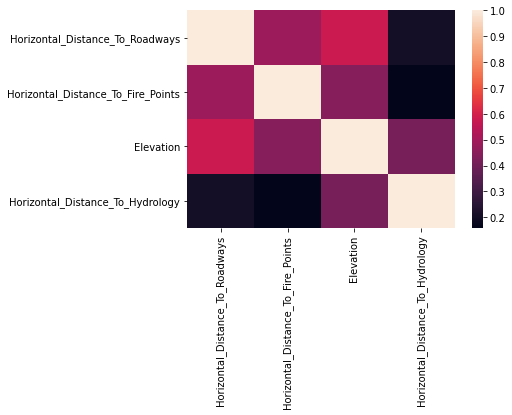

,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Elevation,Horizontal_Distance_To_Hydrology
Horizontal_Distance_To_Roadways,1.000000,0.486386,0.578659,0.203397
Horizontal_Distance_To_Fire_Points,0.486386,1.000000,0.443563,0.158817
Elevation,0.578659,0.443563,1.000000,0.412712
Horizontal_Distance_To_Hydrology,0.203397,0.158817,0.412712,1.000000


In [211]:
position = X.loc[:,["Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points",
                    "Elevation", "Horizontal_Distance_To_Hydrology"]]
dpostion = position.diff(axis=1).iloc[:,1:]
dpostion.loc[:,"Cover_Type"] = y.loc[shade_delta.index]

for var in ["Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points",
                    "Elevation", "Horizontal_Distance_To_Hydrology"] :
    print(var, " ANOVA $\eta^2$ = ",  eta_squared(y,position.loc[:,var]))
plt.show()

sns.heatmap(position[["Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points",
                    "Elevation", "Horizontal_Distance_To_Hydrology"]].corr())
plt.show()
position.corr()

In [213]:
X_ = X_train.loc[:,["Horizontal_Distance_To_Roadways",
                    "Horizontal_Distance_To_Fire_Points",
                    "Horizontal_Distance_To_Hydrology"]]
std = StandardScaler().fit(X_)
X_ = pd.DataFrame(std.transform(X_), index=X_.index, columns=X_.columns)
test = X_test.loc[:,["Horizontal_Distance_To_Roadways",
                     "Horizontal_Distance_To_Fire_Points",
                     "Horizontal_Distance_To_Hydrology"]]
test = pd.DataFrame(std.transform(test), index=test.index, columns=test.columns)


pca = PCA(n_components=3).fit(X_)
X_proj = pd.DataFrame(pca.transform(X_), 
                      index = X_train.index, 
                      columns=["ax_"+str(k) for k in range(1,4)])
test_proj = pd.DataFrame(pca.transform(test), 
                      index = test.index, 
                      columns=["ax_"+str(k) for k in range(1,4)])

clf = LinearSVC(dual=False, max_iter=10000)
param_grid = {"C": [1, 10, 100, 1000, 10000]}
print("classif accuracy")

grid = GridSearchCV(clf, cv=5, n_jobs=8, param_grid=param_grid)
grid.fit(X_, y_train)
print("orginal data = ", grid.score(test, y_test))

for k in range(1,4) :
    grid = GridSearchCV(clf, cv=5, n_jobs=8, param_grid=param_grid)
    grid.fit(X_proj.iloc[:,:k], y_train)
    print("PCA",k,"components = ", grid.score(test_proj.iloc[:,:k], y_test))
print("\nExplained variance : \n",pd.Series(pca.explained_variance_ratio_, index = [ "ax_"+str(k) for k in range(1,pca.n_components+1)]))

pd.DataFrame(pca.components_, 
             index = [ "ax_"+str(k) for k in range(1,pca.n_components+1)],
             columns = pca.feature_names_in_
            )


classif accuracy
orginal data =  0.3055555555555556
PCA 1 components =  0.27724867724867724
PCA 2 components =  0.2896825396825397
PCA 3 components =  0.3055555555555556

Explained variance : 
 ax_1    0.529133
ax_2    0.297914
ax_3    0.172953
dtype: float64


,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology
ax_1,0.658105,0.640460,0.395865
ax_2,-0.221268,-0.338040,0.914751
ax_3,-0.719679,0.689595,0.080752


Let's project the whole dataset on PCA axis :

loc_pca_1  ANOVA $\eta^2$ =  0.407588936761355
loc_pca_2  ANOVA $\eta^2$ =  0.023246148105766407
loc_pca_3  ANOVA $\eta^2$ =  0.02693780989323817


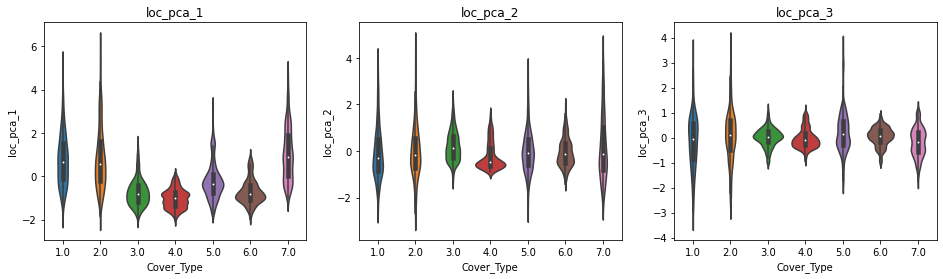

In [217]:
pca = PCA(n_components=3)
X_ = X.loc[:,["Horizontal_Distance_To_Roadways",
              "Horizontal_Distance_To_Fire_Points",
              "Horizontal_Distance_To_Hydrology"]]
std = StandardScaler().fit(X_)
X_ = pd.DataFrame(std.transform(X_), index=X_.index, columns=X_.columns)

pca.fit(X_)
X_proj = pd.DataFrame(pca.transform(X_), index = X_.index, 
                      columns=["loc_pca_"+str(k) for k in range(1,4)])

## check soil class separation (ANOVA :)
X_projy = X_proj.copy()
X_projy.loc[:,"Cover_Type"] = y_train
plt.figure(figsize=(16,4))
for i, var in enumerate(X_proj.columns) :
    print(var, " ANOVA $\eta^2$ = ",  eta_squared(y, X_proj.loc[:,var]))
    plt.subplot(1,3,i+1)
    sns.violinplot(y = var, x = "Cover_Type", data = X_projy)
    plt.title(var)
plt.show()

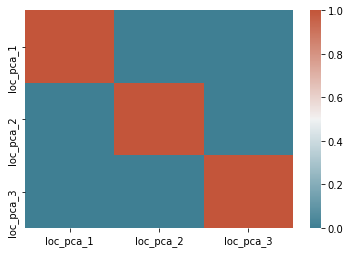

In [218]:
corr = X_proj.corr()
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )

In [219]:
X_new = X_proj.copy()
X_new.loc[:,"Elevation"] = X.loc[:,"Elevation"]


shade = X.loc[:,["Hillshade_9am","Hillshade_Noon", "Hillshade_3pm","Hillshade_9am"]]
X_new.loc[:,"hillshade_std"] = shade.std(axis=1)
X_new.loc[:,"hillshade_mean"] = shade.mean(axis=1)

,loc_pca_1,loc_pca_2,loc_pca_3,Elevation,hillshade_std,hillshade_mean
loc_pca_1,1.000000e+00,6.460147e-17,2.592980e-16,0.655391,-0.180973,0.225606
loc_pca_2,6.460147e-17,1.000000e+00,-1.056694e-16,0.105742,-0.010201,-0.055607
loc_pca_3,2.592980e-16,-1.056694e-16,1.000000e+00,-0.109960,0.113061,-0.065888
Elevation,6.553913e-01,1.057422e-01,-1.099604e-01,1.000000,-0.141936,0.263977
hillshade_std,-1.809726e-01,-1.020081e-02,1.130609e-01,-0.141936,1.000000,-0.151259
hillshade_mean,2.256055e-01,-5.560716e-02,-6.588783e-02,0.263977,-0.151259,1.000000


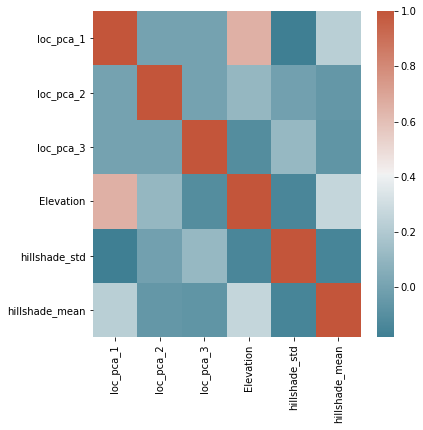

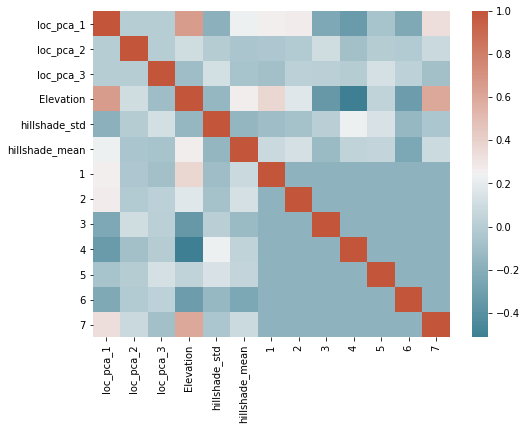

In [223]:
X_new = pd.DataFrame(StandardScaler().fit_transform(X_new),
                     index = X_new.index, columns=X_new.columns)
corr = X_new.corr()

plt.figure(figsize=(6,6))
# cg = sns.clustermap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# cg.ax_row_dendrogram.set_visible(False)
cg = sns.heatmap(corr, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
plt.savefig(RES_PATH + "figures/"+"correlation_matrix_preprocessed")


plt.figure(figsize=(8,6))
corr_std =(pd.concat((X_new,pd.get_dummies(y)), axis =1)).corr()
cg = sns.heatmap(corr_std, cmap = sns.diverging_palette(220, 20, as_cmap=True) )
# # cg.ax_row_dendrogram.set_visible(False)
# plt.savefig(RES_PATH + "figures/"+"correlation_matrix_dummies_preprocessed")

corr

In [227]:
# X_new.to_csv(RES_PATH+"X_num_preprocessed_pca.csv")
# X_new.to_csv(RES_PATH+"X_num_preprocessed.csv")

* TODO/idea : Run a "cover_type $\sim$ numerical_var" ANOVA to see how the regularization paths change. This would answer the question "does the numerical variable separate the classes well from the categorical variable?"

<a id ="section3"></a>
<a id ="section3.1"></a>
[back to menu](#menu)

# 3. Classification : 

First of all, let's recap the different preprocess on data that are to be used : 

## 3.A Calling preprocesses : 

In [26]:
df_train = pd.read_csv(DATA_PATH+"/train.csv", index_col=0)
X = df_train.loc[:,[col for col in df_train.columns if col != "Cover_Type"]]
y = df_train.loc[:,"Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
train_index = X_train.index
test_index = X_test.index

In [32]:
X_num = pd.read_csv(RES_PATH+"X_num_preprocessed.csv", index_col=0)
X_num_pca = pd.read_csv(RES_PATH+"X_num_preprocessed_pca.csv", index_col=0)

X_cat_selected = pd.read_csv(RES_PATH+"X_cat_feature_selection.csv", index_col=0)
X_cat_projected = pd.read_csv(RES_PATH+"X_cat_PCA20.csv", index_col=0)

cte_var = ['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type15', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36']
X0 = X.drop(cte_var, axis=1)
X1 = pd.concat((X_num, X_cat_selected), axis = 1)
X2 = pd.concat((X_num, X_cat_projected), axis = 1)
X3 = pd.concat((X_num_pca, X_cat_projected), axis = 1)

## no preprocess at all : 
X0_train = X0.loc[train_index,:]
X0_test = X0.loc[test_index,:]
my_std0 = StandardScaler().fit(X0_train)
X0_train_std = pd.DataFrame(my_std0.transform(X0_train), 
                            index=X0_train.index, columns= X0_train.columns)
X0_test_std = pd.DataFrame(my_std0.transform(X0_test), 
                            index=X0_test.index, columns= X0_test.columns)

## num data cleaned, cat feature selected 
X1_train = X1.loc[train_index,:]
X1_test = X1.loc[test_index,:]
my_std1 = StandardScaler().fit(X1_train)
X1_train_std = pd.DataFrame(my_std1.transform(X1_train), 
                            index=X1_train.index, columns= X1_train.columns)
X1_test_std = pd.DataFrame(my_std1.transform(X1_test), 
                            index=X1_test.index, columns= X1_test.columns)

## num data cleaned, cat feature projected with PCA 
X2_train = X2.loc[train_index,:]
X2_test = X2.loc[test_index,:]
my_std2 = StandardScaler().fit(X2_train)
X2_train_std = pd.DataFrame(my_std2.transform(X2_train), 
                            index=X2_train.index, columns= X2_train.columns)
X2_test_std = pd.DataFrame(my_std2.transform(X2_test), 
                            index=X2_test.index, columns= X2_test.columns)

## num data cleaned and PCA, cat feature projected with PCA 
X3_train = X3.loc[train_index,:]
X3_test = X3.loc[test_index,:]
my_std3 = StandardScaler().fit(X3_train)
X3_train_std = pd.DataFrame(my_std3.transform(X3_train), 
                            index=X3_train.index, columns= X3_train.columns)
X3_test_std = pd.DataFrame(my_std3.transform(X3_test), 
                            index=X3_test.index, columns= X3_test.columns)

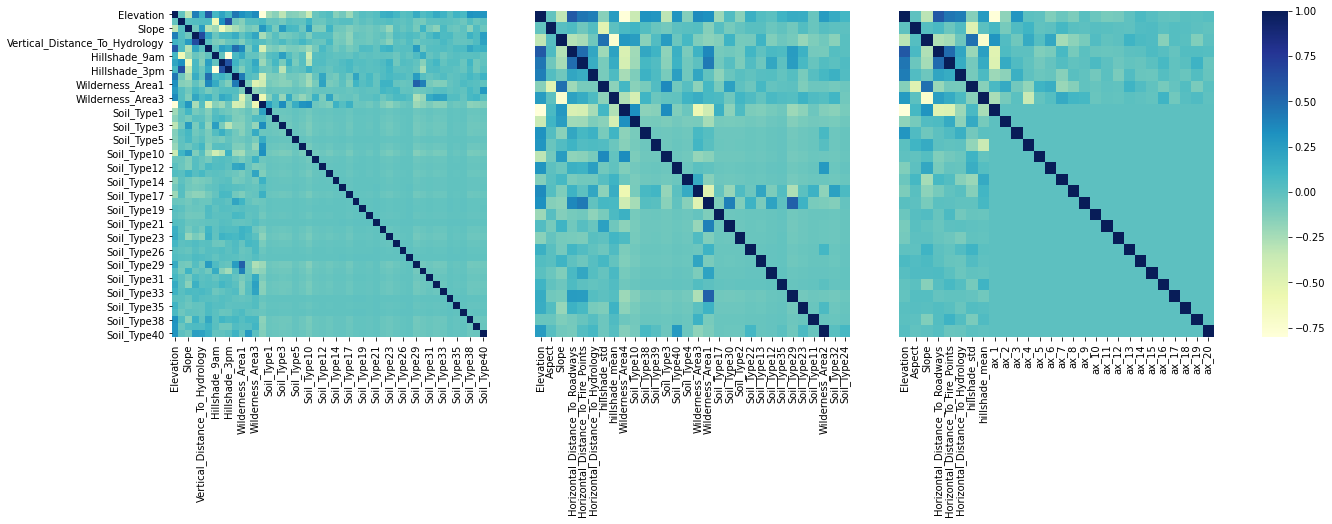

In [33]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]},
                                    figsize=(20,6))
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(X0.corr(),cmap="YlGnBu",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(X1.corr(),cmap="YlGnBu",cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g3 = sns.heatmap(X2.corr(),cmap="YlGnBu",ax=ax3, cbar_ax=axcb)
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

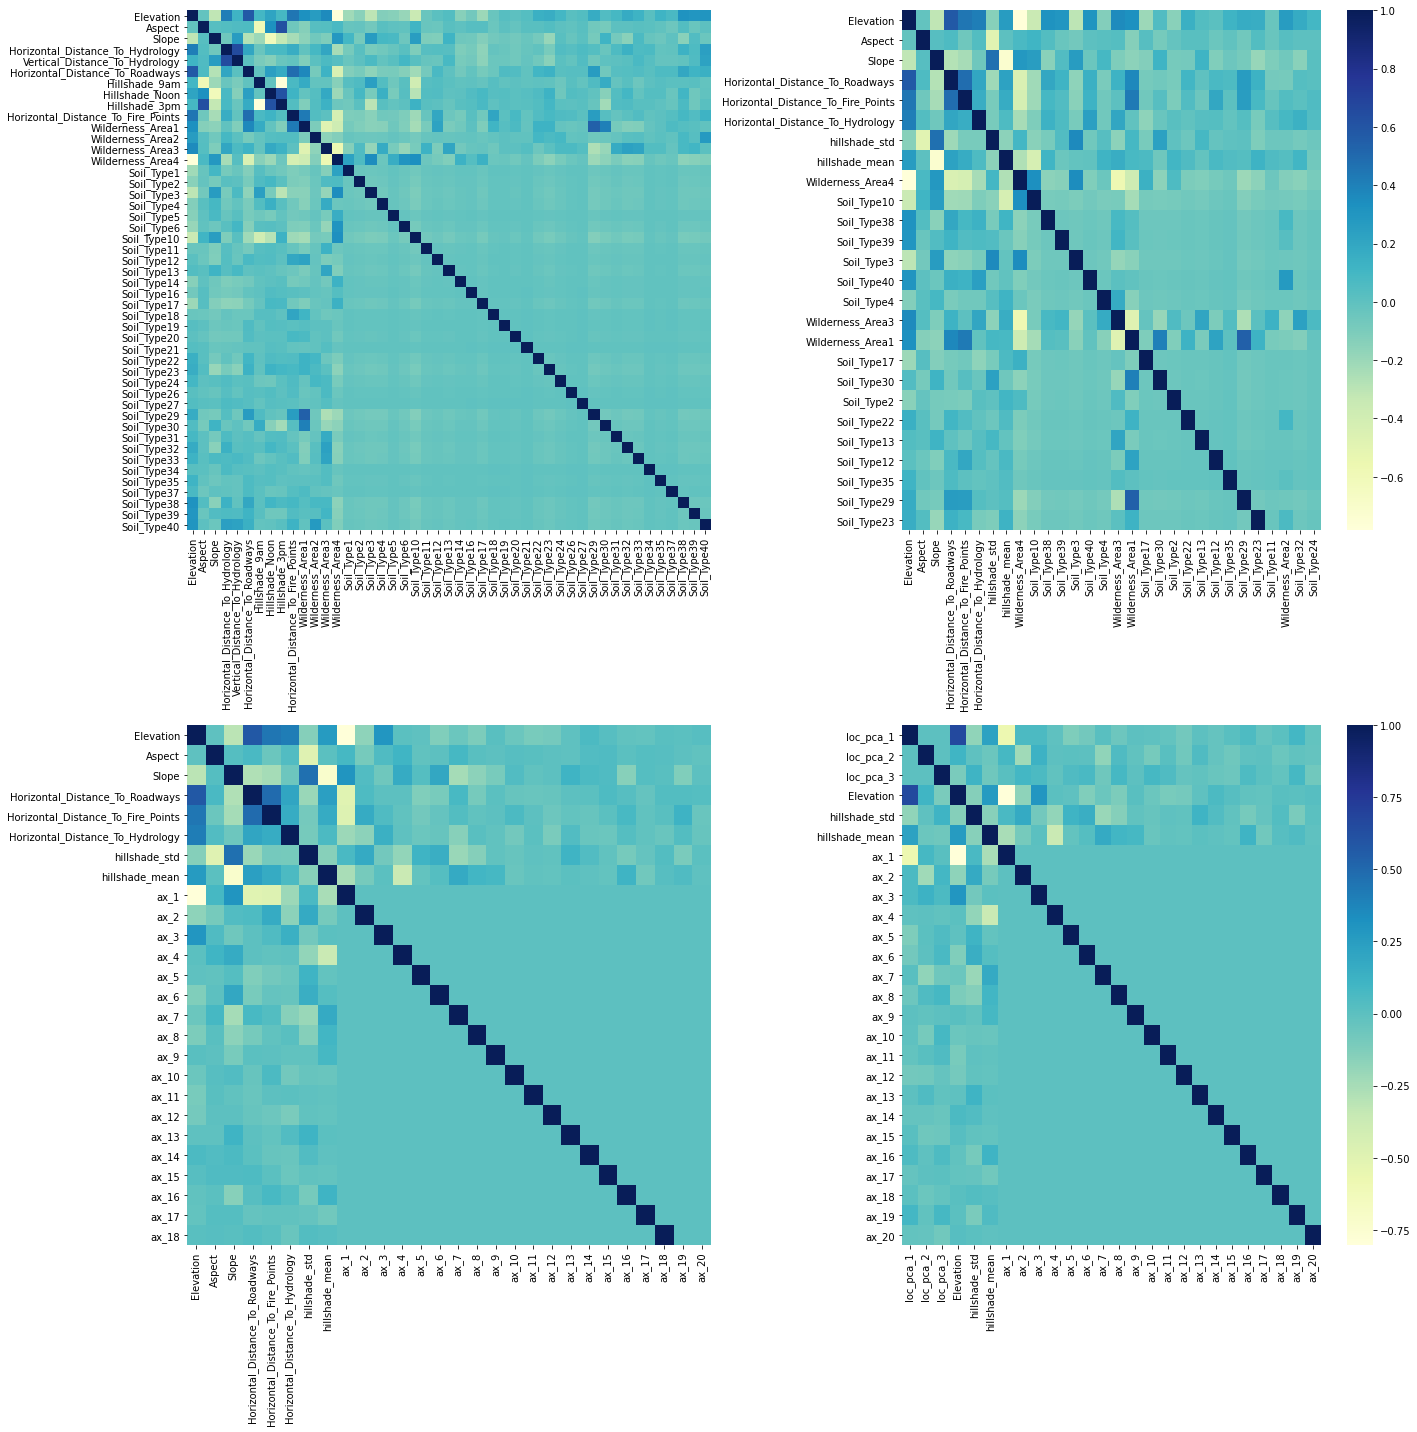

In [35]:
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,20))

ax1.get_shared_y_axes().join(ax2,ax3,ax4)
g1 = sns.heatmap(X0.corr(),cmap="YlGnBu",ax=ax1,cbar=False)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(X1.corr(),cmap="YlGnBu",ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
# g2.set_yticks([])
g3 = sns.heatmap(X2.corr(),cmap="YlGnBu",ax=ax3,cbar=False)
g3.set_ylabel('')
g3.set_xlabel('')
# g3.set_yticks([])
g4 = sns.heatmap(X3.corr(),cmap="YlGnBu",ax=ax4)
g4.set_ylabel('')
g4.set_xlabel('')
# g4.set_yticks([])
# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
plt.tight_layout()
plt.show()

In [36]:
## Remove all correlation with pca projection : 
## for X0
n0_compo = X0.shape[1]
X0_pca = PCA(n_components=n0_compo).fit_transform(X0)
X0_pca = pd.DataFrame(X0_pca, index=X0.index, columns=["ax_"+str(k+0) for k in range(n0_compo)])
## num data cleaned, cat feature projected with PCA 
X0_pca_train = X0_pca.loc[train_index,:]
X0_pca_test = X0_pca.loc[test_index,:]

## for X1
n1_compo = X1.shape[1]
X1_pca = PCA(n_components=n1_compo).fit_transform(X1)
X1_pca = pd.DataFrame(X1_pca, index=X1.index, columns=["ax_"+str(k+1) for k in range(n1_compo)])
## num data cleaned, cat feature projected with PCA 
X1_pca_train = X1_pca.loc[train_index,:]
X1_pca_test = X1_pca.loc[test_index,:]

## for X2
n2_compo = X2.shape[1]
X2_pca = PCA(n_components=n2_compo).fit_transform(X2)
X2_pca = pd.DataFrame(X2_pca, index=X2.index, columns=["ax_"+str(k+2) for k in range(n2_compo)])
## num data cleaned, cat feature projected with PCA 
X2_pca_train = X2_pca.loc[train_index,:]
X2_pca_test = X2_pca.loc[test_index,:]

## for X3
n3_compo = X3.shape[1]
X3_pca = PCA(n_components=n3_compo).fit_transform(X3)
X3_pca = pd.DataFrame(X3_pca, index=X3.index, columns=["ax_"+str(k+3) for k in range(n3_compo)])
## num data cleaned, cat feature projected with PCA 
X3_pca_train = X3_pca.loc[train_index,:]
X3_pca_test = X3_pca.loc[test_index,:]


In [37]:
datasets = [
            (0,X0_train_std,X0_test_std),
            (1,X1_train_std,X1_test_std),
            (2,X2_train_std,X2_test_std),
            (3,X3_train_std,X3_test_std),
            (4,X0_pca_train,X0_pca_test),
            (5,X1_pca_train,X1_pca_test),
            (6,X2_pca_train,X2_pca_test),
            (7,X3_pca_train,X3_pca_test),
            ]

There are multiple classifier possible for our task. Refering to [sklearn Supervised Learning User guide](https://scikit-learn.org/stable/supervised_learning.html). If the classification was binary, it would have been cool to try [this comparison of classical classification task](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). I may be inspired by this in my following code.

For [multi-class classification](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification), there are 3 possible votes : 

In [38]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier


clf_ovr = OneVsRestClassifier(LinearSVC(random_state=0, max_iter=1e6))
# clf_ovr.fit(X0_train_std, y_train)
clf_ovo = OneVsOneClassifier(LinearSVC(random_state=0, max_iter=1e6))
# clf_ovo.fit(X0_train_std, y_train)
clf_occ = OutputCodeClassifier(LinearSVC(random_state=0, max_iter=1e6),
                           code_size=2, random_state=0)
# clf_occ.fit(X0_train_std, y_train)

# pred_ovr = clf_ovr.predict(X0_test_std)
# pred_ovo = clf_ovo.predict(X0_test_std)
# pred_output_code = clf.predict(X0_test_std)

# print(clf_ovr.score(X0_test_std,y_test),
#       clf_ovo.score(X0_test_std,y_test),
#       clf.score(X0_test_std,y_test))

The last performs worse and it is quite long to run. I'll continue with OVO only.

Let's find the best model for each dataset :

In [39]:
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
#     "Gaussian Process", ## more than 1h !!!
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# scores_df = pd.DataFrame()
# times_df = pd.DataFrame()

# # iterate over datasets
# for ds in datasets:
#     # preprocess dataset, split into training and test part
#     i_ds, X_train, X_test = ds
# #   ##  iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         t_start = time.time()
#         clf_ovo = OneVsOneClassifier(clf, n_jobs=8)
#         clf_ovo.fit(X_train, y_train)
#         score = clf_ovo.score(X_test, y_test)
#         t_stop = time.time()
#         with open(RES_PATH+"classif_models/"+str(i_ds)+"dataset_"+name+".pkl", "wb") as f :
#             pickle.dump( clf, f, pickle.HIGHEST_PROTOCOL)
#         scores_df.loc[i_ds,name] = score
#         times_df.loc[i_ds,name] = t_stop - t_start
#         print(i_ds, name, score)
# scores_df.to_csv(RES_PATH+"compare_classif_models_score.csv")
# times_df.to_csv(RES_PATH+"compare_classif_models_times.csv")

In [40]:
scores_df = pd.read_csv(RES_PATH+"compare_classif_models_score.csv",index_col=0)
scores_df

,Nearest Neighbors,Linear SVM,RBF SVM,Decision Tree,Random Forest,Neural Net,AdaBoost,Naive Bayes,QDA
0,0.799735,0.701587,0.773016,0.732804,0.689683,0.775132,0.749206,0.490212,0.441005
1,0.791799,0.687831,0.802910,0.731481,0.698148,0.768783,0.742857,0.466138,0.404762
2,0.794974,0.703439,0.777513,0.740212,0.693915,0.780423,0.771693,0.633069,0.576984
3,0.813492,0.702381,0.775397,0.696561,0.682804,0.785450,0.737566,0.593122,0.409524
4,0.826190,0.719577,0.133598,0.714286,0.700265,0.710317,0.755026,0.596032,0.427778
5,0.791005,0.696561,0.807143,0.703704,0.675397,0.756349,0.739683,0.596032,0.406878
6,0.797354,0.703439,0.754233,0.705026,0.661376,0.774339,0.739947,0.607937,0.577249
7,0.791005,0.697354,0.807143,0.697884,0.677513,0.754233,0.741005,0.593122,0.405820


In [41]:
times_df = pd.read_csv(RES_PATH+"compare_classif_models_times.csv", index_col=0)
times_df

,Nearest Neighbors,Linear SVM,RBF SVM,Decision Tree,Random Forest,Neural Net,AdaBoost,Naive Bayes,QDA
0,17.019813,6.468931,59.618168,0.462922,0.687727,14.107391,3.533867,0.378033,0.706198
1,14.893226,5.541974,45.061024,0.398874,0.676596,12.019682,3.369611,0.343076,0.791143
2,14.247006,5.540740,48.553928,0.701491,0.758192,13.865766,6.933675,0.358742,0.992963
3,14.885334,5.190781,90.084564,0.931312,0.788404,14.192776,7.847549,0.363959,0.712773
4,17.430017,732.697043,74.762680,1.205033,0.987755,12.481229,12.279679,0.408645,1.078117
5,15.605935,6.514596,45.221306,0.934420,0.890597,12.406370,9.829463,0.332906,0.781618
6,15.199486,5.379707,51.099873,0.781930,0.843552,14.861792,9.541407,0.327263,0.617705
7,15.685208,6.191312,44.658276,0.857266,0.847621,13.177748,9.057373,0.364178,0.619402


In [42]:
clf = LinearSVC(C=0.025, dual=False)

t_start = time.time()
clf_ovo = OneVsOneClassifier(clf, n_jobs=8)
clf_ovo.fit(X_train, y_train)
score = clf_ovo.score(X_test, y_test)
t_stop = time.time()
print(t_stop - t_start, score)
    

0.9293477535247803 0.719047619047619


In [43]:
clf = LinearSVC(C=1000, dual=False)

t_start = time.time()
clf_ovo = OneVsOneClassifier(clf, n_jobs=8)
clf_ovo.fit(X_train, y_train)
score = clf_ovo.score(X_test, y_test)
t_stop = time.time()
print(t_stop - t_start, score)
    

0.33674120903015137 0.7198412698412698


Now, we just have to find the best parameters for each best model (because doing cross validation for each model, on each dataset would have been too fastidious) :

In [44]:
from sklearn.model_selection import GridSearchCV

# patch_sklearn()

classifiers = [
    KNeighborsClassifier(3),
#     LinearSVC(C=0.025, dual=False),
#     SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(alpha=1, max_iter=1000, early_stopping=True),
    AdaBoostClassifier(),
]

param_grid_dict = {
    "Nearest Neighbors" : {"estimator__n_neighbors" : [2,3,5,7,9,15]},
#     "SVM" :  {"estimator__C" : [0.01, 0.1, 1, 10, 100, 1000], 
#               "estimator__kernel" : ["linear", "poly", "rbf", "sigmoid"]},
    "Decision Tree" : {"estimator__criterion" : ["gini", "entropy"],
                       "estimator__max_depth": [1, 5, 10],
                       "estimator__min_samples_leaf" : [1, 5, 10]},
    "Neural Net" : {"estimator__hidden_layer_sizes" : [(50,), (100,), (200,)] ,
                    "estimator__alpha" : [1e-5,1e-4,1e-3,1e-2,1e-1],
                    "estimator__learning_rate" : ["constant","invscaling","invscaling"]
                   },
    "AdaBoost" : {"estimator__n_estimators" : [10, 20, 50, 70, 100], 
                  "estimator__learning_rate" : [0.001, 0.1, 1, 10, 100]},
}
names = list(param_grid_dict.keys())

best_scores_df = pd.DataFrame()
CV_times_df = pd.DataFrame()
best_params = {}
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    i_ds, X_train, X_test = ds
#   ##  iterate over classifiers
    for name, clf in zip(names, classifiers):
        t_start = time.time()
        parameters = param_grid_dict[name]
        clf_ovo = OneVsOneClassifier(clf)
#         model_tunning = GridSearchCV(clf_ovo, param_grid=parameters,
#                                     n_jobs = 20)
        
#         model_tunning.fit(X_train, y_train)
#         score = model_tunning.best_estimator_.score(X_test, y_test)
#         best_params[name] = model_tunning.best_params_
#         t_stop = time.time()
        
#         print(i_ds, name, score)
        
#         best_scores_df.loc[i_ds,name] = score
#         CV_times_df.loc[i_ds,name] = t_stop - t_start
#         ## save at each iteration : 
#         with open(RES_PATH+"CV_classif_models/"+str(i_ds)+"dataset_"+name+".pkl", "wb") as f :
#             pickle.dump( clf, f, pickle.HIGHEST_PROTOCOL)
#         with open(RES_PATH+"dict_best_params.pkl", "wb") as f :
#             pickle.dump( best_params, f, pickle.HIGHEST_PROTOCOL)
#         best_scores_df.to_csv(RES_PATH+"CV_classif_models_score.csv")
#         CV_times_df.to_csv(RES_PATH+"CV_classif_models_times.csv")
## scores : 
print("best models, score on test set ")
pd.read_csv(RES_PATH+"remote/CV_classif_models_score.csv")

best models, score on test set 


,Unnamed: 0,Nearest Neighbors,Decision Tree,Neural Net,AdaBoost
0,0,0.799735,0.788889,0.771164,0.754762
1,1,0.791799,0.777513,0.762169,0.745238
2,2,0.794974,0.788889,0.765344,0.781217
3,3,0.814286,0.780159,0.783862,0.762698
4,4,0.826190,0.788360,0.779894,0.778042
5,5,0.791005,0.744444,0.778836,0.763757
6,6,0.797354,0.764815,0.776190,0.753439
7,7,0.804233,0.764815,0.779630,0.754762


In [45]:
## times : 
pd.read_csv(RES_PATH+"remote/CV_classif_models_times.csv")

,Unnamed: 0,Nearest Neighbors,Decision Tree,Neural Net,AdaBoost
0,0,42.403376,1.152279,170.054633,17.734294
1,1,36.385628,0.961180,129.848516,17.312319
2,2,36.113782,2.985500,132.321136,42.840688
3,3,34.978665,2.905990,125.619503,42.815697
4,4,41.625208,5.937351,162.358823,89.633263
5,5,36.364025,4.619634,124.442442,63.726529
6,6,35.973102,4.402086,123.902242,59.638020
7,7,35.218396,3.687257,117.942923,53.960739


In [ ]:
from sklearn.model_selection import GridSearchCV

# patch_sklearn()

classifiers = [
    LinearSVC(C=0.025, dual=False),
]

param_grid_dict = {
    "Linear SVC" :  {"estimator__C" : [0.01, 0.1, 1, 10, 100, 1000]}
}
names = list(param_grid_dict.keys())

# best_scores_df = pd.DataFrame()
# CV_times_df = pd.DataFrame()
# best_params = {}
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    i_ds, X_train, X_test = ds
#   ##  iterate over classifiers
    for name, clf in zip(names, classifiers):
        t_start = time.time()
        parameters = param_grid_dict[name]
        clf_ovo = OneVsOneClassifier(clf)
        model_tunning = GridSearchCV(clf_ovo, param_grid=parameters,
                                    n_jobs = 20)
        
        model_tunning.fit(X_train, y_train)
        score = model_tunning.best_estimator_.score(X_test, y_test)
        best_params[name] = model_tunning.best_params_
        t_stop = time.time()
        
        print(i_ds, name, score)
        
        best_scores_df.loc[i_ds,name] = score
        CV_times_df.loc[i_ds,name] = t_stop - t_start
        ## save at each iteration : 
        with open(RES_PATH+"CV_classif_models/"+str(i_ds)+"dataset_"+name+".pkl", "wb") as f :
            pickle.dump( clf, f, pickle.HIGHEST_PROTOCOL)
        with open(RES_PATH+"dict_best_params.pkl", "wb") as f :
            pickle.dump( best_params, f, pickle.HIGHEST_PROTOCOL)
        best_scores_df.to_csv(RES_PATH+"CV_classif_models_score.csv")
        CV_times_df.to_csv(RES_PATH+"CV_classif_models_times.csv")
## scores : 
print("best models, score on test set ")
best_scores_df

In [47]:
best_scores_df = pd.read_csv(RES_PATH+"remote/CV_classif_models_score.csv")

In [48]:
with open(RES_PATH+"remote/dict_best_params.pkl", "rb") as f :
    best_params = pickle.load(f)

In [49]:
best_params

{'Nearest Neighbors': {'estimator__n_neighbors': 3},
 'Decision Tree': {'estimator__criterion': 'gini',
  'estimator__max_depth': 10,
  'estimator__min_samples_leaf': 1},
 'Neural Net': {'estimator__alpha': 1e-05,
  'estimator__hidden_layer_sizes': (200,),
  'estimator__learning_rate': 'invscaling'},
 'AdaBoost': {'estimator__learning_rate': 1, 'estimator__n_estimators': 100}}

,Unnamed: 0,Nearest Neighbors,Decision Tree,Neural Net,AdaBoost
0,0,0.799735,0.788889,0.771164,0.754762
1,1,0.791799,0.777513,0.762169,0.745238
2,2,0.794974,0.788889,0.765344,0.781217
3,3,0.814286,0.780159,0.783862,0.762698
4,4,0.826190,0.788360,0.779894,0.778042
5,5,0.791005,0.744444,0.778836,0.763757
6,6,0.797354,0.764815,0.776190,0.753439
7,7,0.804233,0.764815,0.779630,0.754762


In [1]:
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# h = 0.02  # step size in the mesh

# names = [
# #     "Nearest Neighbors", ## pb of ram !!
# #     "Linear SVM",
#     "RBF SVM",
# #     "Gaussian Process",
# #     "Decision Tree",
# #     "Random Forest",
# #     "Neural Net",
# #     "AdaBoost",
# #     "Naive Bayes",
# #     "QDA",
# ]

# classifiers = [
# #     KNeighborsClassifier(3),
# #     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
# #     GaussianProcessClassifier(1.0 * RBF(1.0)),
# #     DecisionTreeClassifier(max_depth=5),
# #     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
# #     MLPClassifier(alpha=1, max_iter=1000),
# #     AdaBoostClassifier(),
# #     GaussianNB(),
# #     QuadraticDiscriminantAnalysis(),
# ]

# datasets = [
#     (0,np.array(X0),np.array(pd.get_dummies(y))),
#     (1,np.array(X1),np.array(pd.get_dummies(y))),
#     (2,np.array(X2),np.array(pd.get_dummies(y))),
# ]

# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# for ds_cnt, ds in enumerate(datasets):
#     # preprocess dataset, split into training and test part

#     i_ds, X_, y_ = ds
#     X_train, X_test, y_train, y_test = train_test_split(
#         X_, y_, test_size=0.4, random_state=42
#     )

#     x_min, x_max = X_[:, 0].min() - 0.5, X_[:, 0].max() + 0.5
#     y_min, y_max = X_[:, 1].min() - 0.5, X_[:, 1].max() + 0.5
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(["#FF0000", "#0000FF"])
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
#     # Plot the testing points
#     ax.scatter(
#         X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
#     )
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

#     # iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#         clf.fit(X_train, y_train)
#         score = clf.score(X_test, y_test)

#         # Plot the decision boundary_. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#         if hasattr(clf, "decision_function"):
#             Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#         else:
#             Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

#         # Put the result into a color plot
#         Z = Z.reshape(xx.shape)
#         ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

#         # Plot the training points
#         ax.scatter(
#             X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
#         )
#         # Plot the testing points
#         ax.scatter(
#             X_test[:, 0],
#             X_test[:, 1],
#             c=y_test,
#             cmap=cm_bright,
#             edgecolors="k",
#             alpha=0.6,
#         )

#         ax.set_xlim(xx.min(), xx.max())
#         ax.set_ylim(yy.min(), yy.max())
#         ax.set_xticks(())
#         ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name)
#         ax.text(
#             xx.max() - 0.3,
#             yy.min() + 0.3,
#             ("%.2f" % score).lstrip("0"),
#             size=15,
#             horizontalalignment="right",
#         )
#         i += 1
#         with open(res_path+"classif_models/"+i_ds+"dataset_"+name+".pkl", "wb") as f :
#             pickle.dump( clf, f, pickle.HIGHEST_PROTOCOL)

# plt.tight_layout()
# plt.show()

NameError: name 'np' is not defined